# Clasificación de Anfitriones de Airbnb.

## Introducción.

Airbnb ha transformado la forma en que las personas viajan y se hospedan, pero también ha generado una enorme cantidad de datos que permiten observar el funcionamiento interno de su modelo de negocio. Al prestar sus servicios a través de una plataforma digital, la gran cantidad de datos que se registran revelan patrones operativos, decisiones estratégicas y dinámicas regionales que pueden ser analizadas para entender mejor cómo se comportan los anfitriones, qué tipo de alojamientos ofrecen y cómo varía la experiencia del usuario según la ubicación. Este análisis busca explorar ese universo de información desde una perspectiva práctica y accesible.

La idea es sencilla: entender cómo operan los anfitriones en Airbnb. ¿Qué tipo de alojamientos ofrecen? ¿Cómo fijan sus precios? ¿Cuántas calificaciones reciben? ¿Y cómo influye la región en todo esto? A lo largo del análisis iré desmenuzando estas preguntas, buscando construir perfiles operativos que ayuden a identificar patrones comunes entre anfitriones de distintas partes del mundo. El objetivo no es solo mostrar datos, sino contar una historia que conecte decisiones individuales con tendencias globales.

Se ha obtenido una base de datos pública con información sobre algunos alojamientos de Airbnb a nivel mundial. De aquí se extraerá información sobre los anfitriones y sus alojamientos, incluyendo variables como el tipo de propiedad, el precio por noche, las noches mínimas requeridas, la ubicación geográfica y el promedio de calificaciones recibidas mensualmente.

Después de realizar una lectura preliminar a la estructura de la base de datos, me interesa responder las siguientes dudas: ¿Se pueden clasificar a los operadores como **ocasionales, semi-profesionales o intensivos**? ¿Cómo varían sus estrategias según la región en la que operan? ¿Qué relación hay entre el volumen de oferta, la calidad percibida y la exigencia de renta mínima?

Para llevar a cabo este análisis se utilizará el lenguaje Python dentro de un entorno Jupyter Notebook. Las principales librerías serán: **Pandas**, para la lectura y estructuración de la base de datos, así como el cálculo de columnas y métricas; **Matplotlib** y **Seaborn**, para la construcción de visualizaciones que faciliten la interpretación de los datos, **Scikit-learn**, para aplicar modelos de agrupación y predicción que nos ayuden a identificar patrones; y **Geopandas** para incorporar mapas que permitan presentar la información por región.

Más allá del componente técnico, en este proyecto busco demostrar cómo el análisis de datos puede convertirse en una herramienta poderosa para entender comportamientos operativos en plataformas digitales. Al integrar variables cuantitativas con contexto geográfico, se pretende construir una narrativa que conecte datos con decisiones reales, mostrando cómo la información puede ser usada para diagnosticar, segmentar y proponer estrategias. Este trabajo será parte de mi portafolio profesional y servirá como base para futuras publicaciones en LinkedIn, donde compartiré tanto el proceso como los hallazgos, con el objetivo de generar conversación y aprendizaje entre colegas y profesionales del análisis de datos.

## Objetivos.

### 🎯 Objetivo 1: Identificar perfiles operativos de anfitriones en Airbnb según su volumen de oferta, precios y calificaciones

Este objetivo busca clasificar a los anfitriones en grupos según su comportamiento operativo: cuántos alojamientos gestionan, qué precios establecen, cuántas noches mínimas exigen y qué calificaciones reciben. El análisis permitirá distinguir entre anfitriones ocasionales (con pocas propiedades y actividad limitada), semi-profesionales (con una oferta más constante y estructurada), y operadores intensivos (con múltiples alojamientos y estrategias más sofisticadas). Esta segmentación será clave para entender cómo se configura la oferta dentro de la plataforma y qué patrones emergen en función del nivel de involucramiento de cada anfitrión.

### 🌍 Objetivo 2: Analizar cómo varían estos perfiles en función de la región geográfica en la que operan

Una vez definidos los perfiles operativos, se buscará examinar cómo se distribuyen geográficamente y si existen diferencias significativas entre regiones como Norteamérica, Centroamérica, Sudamérica, Europa, Asia y África. Este objetivo permitirá explorar si ciertos tipos de anfitriones predominan en determinadas zonas, y si las condiciones del mercado local (demanda turística, regulación, cultura de hospedaje) influyen en el comportamiento operativo. El componente regional aportará contexto estratégico y enriquecerá la interpretación de los datos.

### 🔗 Objetivo 3: Explorar relaciones entre variables clave (precio, noches mínimas, calificación) para entender estrategias de operación y posicionamiento

Este objetivo se enfoca en analizar cómo interactúan las variables más relevantes del dataset: el precio por noche, el número mínimo de noches requeridas y la calificación promedio. Se buscará identificar correlaciones, tendencias y posibles trade-offs entre estas variables, con el fin de entender qué decisiones parecen favorecer una mejor percepción del alojamiento o una mayor rentabilidad. Este análisis permitirá reflexionar sobre las estrategias que los anfitriones adoptan para posicionarse en el mercado y cómo estas decisiones impactan en la experiencia del usuario.

## Importación de la información.

Para este proyecto se trabajará con una base de datos en formato CSV que contiene información sobre alojamientos registrados en Airbnb a nivel mundial. Aunque el sitio original permite realizar una conexión directa vía API o consulta en línea, se ha optado por descargar el archivo localmente en formato CSV. Esta decisión responde a consideraciones de rendimiento y estabilidad durante el análisis, especialmente al trabajar con un archivo de gran tamaño dentro de un entorno Jupyter Notebook de forma local. El archivo será cargado utilizando la librería **Pandas**, que permite leer, estructurar y manipular datos de forma eficiente en Python. La información fue actualizada por última vez en agosto de 2020.

El primer paso será importar las librerías de Python que se emplearán.

In [1]:
# Se inicia con la conexión a las librerías que se trabajarán:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

import geopandas as gpd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Se procede con la importación de la base de datos en formato de Dataframe de Pandas.

In [2]:
# Se convierte el archivo CSV en un DataFrame de Pandas:
archivo = 'air-bnb-listings.csv'
data = pd.read_csv(archivo, sep=";")

**Verificar dimensiones del DataFrame:** Este paso nos permite conocer cuántas filas (registros) y columnas (variables) contiene el dataset. Es útil para tener una idea del volumen de datos con el que trabajaremos.

In [3]:
# Verificar dimensiones del DataFrame:
print("Columnas:", data.shape[1])
print("Filas:", data.shape[0])


Columnas: 17
Filas: 1414018


**Listar nombres de columnas:** Este paso nos ayuda a identificar todas las variables disponibles en el dataset. Es clave para decidir cuáles serán relevantes para el análisis y si es necesario renombrarlas para facilitar su uso. Aunque esto se puede realizar mediante la función ".columns", es mejor aplicar la funcíón ".info()" para también ver el tipo de dato que se tiene y cuantos valores no nulos hay por columna.

In [4]:
# Información por columna:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414018 entries, 0 to 1414017
Data columns (total 17 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Room ID                      1414018 non-null  int64  
 1   Name                         1413309 non-null  object 
 2   Host ID                      1414018 non-null  int64  
 3   Neighbourhood                1414018 non-null  object 
 4   Room type                    1414018 non-null  object 
 5   Room Price                   1414018 non-null  int64  
 6   Minimum nights               1414018 non-null  int64  
 7   Number of reviews            1414018 non-null  int64  
 8   Date last review             1035700 non-null  object 
 9   Number of reviews per month  1019175 non-null  float64
 10  Rooms rent by the host       1414018 non-null  int64  
 11  Availibility                 1414018 non-null  int64  
 12  Updated Date                 1386474 non-n

Contamos con más de **1.4 Millones** de registros y tenemos información completa para casi todas las variables / columnas, siendo en la que hay más registros faltantes la columna *Number of reviews per month* con cerca de unos 400 mil registros vacíos.

A priori, podríamos asumir que los registros que están vacíos en la columna *Number of reviews per month* se deben a que se trata de alojamientos que apenas se han incorporado a la plataforma en el mes corriente, pero esto será difícil de confirmar puesto que no contamos con un registro de la fecha en que se dió de alta el alojamiento, solo de su última actualización.

**Estadísticas descriptivas básicas:** Obtenemos un resumen estadístico de las columnas numéricas (media, desviación estándar, mínimo, máximo, percentiles). Esto nos da una primera idea de la distribución de los datos.

In [5]:
# Estadísticas descriptivas básicas:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Room ID,1414018.0,2.491114e+07,12651485.52,109.00,14786264.75,25498972.00,3.619150e+07,4.439821e+07
Host ID,1414018.0,1.034568e+08,98627385.40,23.00,19590160.25,66126215.00,1.729359e+08,3.582020e+08
Room Price,1414018.0,1.726830e+03,209568.77,0.00,62.00,115.00,2.900000e+02,2.248781e+08
Minimum nights,1414018.0,7.645000e+01,84095.46,1.00,1.00,2.00,3.000000e+00,1.000000e+08
Number of reviews,1414018.0,2.401000e+01,50.73,0.00,0.00,4.00,2.300000e+01,9.700000e+02
Number of reviews per month,1019175.0,1.070000e+00,1.40,0.01,0.17,0.51,1.420000e+00,5.029000e+01
Rooms rent by the host,1414018.0,1.285000e+01,49.79,1.00,1.00,2.00,5.000000e+00,9.370000e+02
Availibility,1414018.0,1.621300e+02,144.68,0.00,0.00,147.00,3.280000e+02,3.650000e+02


Apliqué los métodos ".T" (para transponer la información, es decir, que las columnas pasen a ser las filas y viceversa) y ".round(2)" (para redondear los valores decimales a dos posiciones) porque me parece más sencillo poder leer así la información.

Una particularidad de este método es que solo trabaja con las variables numéricas y a las demás las desprecia de forma automática.

### 🧾 Descripción de columnas del dataset.

**Describir cada variable / columna**: Ya que hemos previsualizado algunos aspectos del DataFrame, vale la pena describir que clase de información obtendremos de cada una de las columnas. En este caso, como sucede con muchas bases de datos públicas y privadas, el autor de la base de datos nos ha compartido la descripción de varias columnas, pero no de todas, por lo que se presenta también lo que yo entiendo representa cada columna.

En la siguiente tabla se presentan las columnas disponibles, su descripción, si se van a utilizar en el estudio y el por qué.

| **Columna**                  | **Descripción**                                                                  | **A usar** | **Justificación**                                            |
|------------------------------|----------------------------------------------------------------------------------|------------|--------------------------------------------------------------|
| `Room ID`                    | Identificador único del alojamiento.                                             | Si         | Será útil para identificar cada alojamiento único.           |
| `Name`                       | Título o nombre del anuncio del alojamiento.                                     | No         | No es relevante el nombre coloquial del alojamiento para este estudio. |
| `Host ID`                    | Identificador único del anfitrión/operador.                                      | Si         | Nos permitirá identificar a cada operador.                   |
| `Neighbourhood`              | Nombre de la colonia/barrio donde se encuentra el alojamiento.                   | No         | Puesto que se analiza información de varias ciudades que yo descnozco, no es práctico para este estudio incluír el nombre de la colonia donde se localiza cada alojamiento, para un estudio específico de una ciudad pudiera resultar útil. |
| `Room type`                  | Tipo de alojamiento: habitación privada, compartida o vivienda completa, etc.    | Si         | Importante para poder como se clasifican los alojamientos y, en base a esto encontrar patrones operativos. |
| `Room Price`                 | Precio por noche por persona en USD.                                             | Si         | Nos ayudará a buscar patrones operativos.                    |
| `Minimum nights`             | Número mínimo de noches requeridas para reservar.                                | Si         | Es de utilidad para calcular el precio mínimo real de cada alojamiento, es decir, el precio por noche por el número mínimo de noches que se requiere reservar. |
| `Number of reviews`          | Total de reseñas recibidas por el alojamiento.                                   | Si         | Nos servirá de guía para identificar la cantidad de reservaciones que ha tenido el alojamiento, aunque no se podrá tomar esta asunción como definitiva.    |
| `Date last review`           | Fecha de la última reseña registrada.                                            | No         | Se considera que no aporta información útil para trabajar sobre los objetivos planteados, puesto que haber recibido una reseña hace más o menos tiempo no es sinónimo de haber recibido huéspedes o de que se evalué a menudo el alojamiento, ni tampoco es sinónimo de un mejor alojamiento.  |
| `Number of reviews per month`| Promedio mensual de reseñas recibidas.                                           | Si         | Resulta últil como indicador histórico de la actividad de cada alojamiento.    |
| `Rooms rent by the host`     | Número total de alojamientos que gestiona el operador.                           | Si         | Nos permitirá obtener un aproximado de los meses de operación de los alojamientos. |
| `Availibility`               | Número de días disponibles para reservar en el año.                              | Si         | Nos da información sobre la forma de operar de los anfitriones.    |
| `Updated Date`               | Fecha de última actualización del anuncio.                                       | No         | Al no contar con todos los registros de actualización del alojamiento, usar esta información puede llevarnos a falsas conclusiones sobre la actividad del operador o del alojamiento.  |
| `City`                       | Nombre de la ciudad donde se localiza el alojamiento.                            | Si         | Nos servirá para el posicionamiento geográfico del alojamiento.    |
| `Country`                    | Nombre del país donde se localiza el alojamiento.                                | Si         | Nos servirá para el posicionamiento geográfico del alojamiento.    |
| `Coordinates`                | Latitud y longitud aproximadas del alojamiento con precisión de 300 m.           | Si         | Nos servirá para el posicionamiento geográfico del alojamiento.    |
| `Location`                   | Ciudad, país y vecindario donde se ubica el alojamiento.                         | No         | Con las demás variables geográficas es suficiente.          |

Aunque se he decidido no utilizar las columnas de *Date last review* y *Updated Date* para el análisis, si se usarán para el filtrado de la base de datos, pues se eliminarán todos los registros que lleven un año o más sin recibir reseñas o actualizaciones, pues se considerarán inactivos.

### 🧹 Limpieza y ajustes a los datos.

En esta etapa se seleccionarán únicamente las columnas que aportan valor al estudio, según los objetivos definidos. Esto facilita la exploración, reduce el ruido y mejora el rendimiento del entorno de trabajo. Además, se renombrarán algunas columnas para facilitar su uso en código y visualizaciones.

Así mismo, se convertirán los tipos de dato de las columnas de fecha de texto a fecha y se dividirán las coordenadas en Latitud y Longitud en dos columnas separadas.

Iniciamos con la conversión de tipo de datos para las columnas de fecha, para ello es necesario visualizar algunos registros para comprender en que formato están los datos.

In [6]:
# Se presentan algunos registros aleatorios de las columnas de fecha para ver el formato:
data[['Date last review', 'Updated Date']].sample(10)

,Date last review,Updated Date
63873,2020-03-12,2020-06-23
1405346,NaN,2020-07-07
708536,NaN,2020-06-11
963621,NaN,2020-06-15
1359632,2020-03-16,2020-06-23
178042,2019-08-19,2020-06-25
370057,2019-07-23,2020-06-26
184173,2020-02-07,2020-06-21
1402045,2020-06-15,2020-06-11
1012828,2016-07-02,2020-06-11


In [7]:
# Convertir columnas de fecha al tipo datetime:
data['Date last review'] = pd.to_datetime(data['Date last review'], format= '%Y-%m-%d', errors='coerce')
data['Updated Date'] = pd.to_datetime(data['Updated Date'], format= '%Y-%m-%d', errors='coerce')

# Verificar el cambio de tipo
data[['Date last review', 'Updated Date']].dtypes

Date last review    datetime64[ns]
Updated Date        datetime64[ns]
dtype: object

Se ha marcado el argumento "errors='coerce'" para que las celdas que contienen valores ausentes o que no están en el formato de fecha esperado, por ejemplo, aquellas que vemos como "NaN", se conviertan a "NaT", es decir Not a Time (no es una variable de tipo temporal/fecha).

Procedemos a aplicar el primer filtro, en el que eliminaremos los registros que no han tenido una actualización o calificación (review) a partir del 7 de agosto de 2019 (un año exacto antes de que se actualizaran los datos en la fuente consultada). Así mismo, se eliminarán los registros con valores ausentes en cualquiera de estas dos columnas (Update Date y Date last review).

In [8]:
# Eliminar registros donde ambas fechas sean NaT
data_filtrada = data.dropna(subset=['Updated Date', 'Date last review'], how='any').copy()

# Verificar cuántos registros quedaron
print(f'Registros con ambas fechas válidas: {data_filtrada.shape[0]}')

# Definir la fecha de corte:
fecha_corte = pd.Timestamp('2019-08-07')

# Filtrar registros con actividad reciente en al menos una de las dos columnas:
airbnb_activos = data_filtrada[
    (data_filtrada['Updated Date'] >= fecha_corte) |
    (data_filtrada['Date last review'] >= fecha_corte)
].copy()

# Verificar cuántos registros quedaron
print(f'Registros activos después del filtro combinado: {airbnb_activos.shape[0]}')

Registros con ambas fechas válidas: 1019175
Registros activos después del filtro combinado: 1018250


La aplicación de este filtro ha implicado la eliminación de casi **400 mil** registros, lo que representa cerca de un tercio del total. Aun así, contamos con una base suficientemente robusta para llevar a cabo el estudio. Si el análisis tuviera un enfoque más **profesional** o estuviera orientado a la **toma de decisiones** operativas, sería recomendable definir criterios más **finos** para conservar o descartar registros. Sin embargo, dado que el propósito de este proyecto es principalmente **académico e ilustrativo**, esta depuración resulta adecuada y funcional para los objetivos planteados.

Ya habiendo filtrado a los alojamientos que se consideran "inactivos", se procede a descartar las columnas que no se van a utilizar.

In [9]:
# Lista de columnas que sí se utilizarán en el análisis:
columnas_utiles = [
    'Room ID',
    'Host ID',
    'Room type',
    'Room Price',
    'Minimum nights',
    'Number of reviews',
    'Number of reviews per month',
    'Rooms rent by the host',
    'Availibility',
    'City',
    'Country',
    'Coordinates'
]

# Crear nuevo DataFrame con solo las columnas seleccionadas:
df_airbnb = airbnb_activos[columnas_utiles].copy()

# Renombrar columnas para facilitar su uso en análisis y visualizaciones:
df_airbnb.rename(columns={
    'Room ID': 'room_id',
    'Host ID': 'host_id',
    'Room type': 'room_type',
    'Room Price': 'price',
    'Minimum nights': 'min_nights',
    'Number of reviews': 'total_reviews',
    'Number of reviews per month': 'monthly_reviews',
    'Rooms rent by the host': 'host_listings',
    'Availibility': 'availability',
    'City': 'city',
    'Country': 'country',
    'Coordinates': 'coordinates'
}, inplace=True)

# Verificar estructura final:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018250 entries, 0 to 1414017
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   room_id          1018250 non-null  int64  
 1   host_id          1018250 non-null  int64  
 2   room_type        1018250 non-null  object 
 3   price            1018250 non-null  int64  
 4   min_nights       1018250 non-null  int64  
 5   total_reviews    1018250 non-null  int64  
 6   monthly_reviews  1018250 non-null  float64
 7   host_listings    1018250 non-null  int64  
 8   availability     1018250 non-null  int64  
 9   city             1018250 non-null  object 
 10  country          1018250 non-null  object 
 11  coordinates      1018250 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 101.0+ MB


Viendo la información previa, nos podemos dar cuenta que no será necesario eliminar más registros debido a datos nulos, pues contamos con información en todas las columnas para todos los registros.

Como se ha mencionado antes, para poder tener una comparativa real del mínimo que un cliente tendría que pagar para alojarse en cada alojamiento de la base de datos, he decidido calcular el precio mínimo real como el precio por la cantidad mínima de noches que se debe de reservar el alojamiento.

In [10]:
# Crear la columna 'real_min_price' como producto de precio por noche y noches mínimas:
df_airbnb['real_min_price'] = df_airbnb['price'] * df_airbnb['min_nights']

Ahora, dividiremos la columna de Coordenadas en dos columnas: Latitud y Longitud.

In [11]:
# Separar la columna 'coordinates' en 'latitude' y 'longitude':
df_airbnb[['latitude', 'longitude']] = df_airbnb['coordinates'].str.split(', ',expand=True)

# Convertir las columnas de latitud y longitud a tipo float
df_airbnb['latitude'] = pd.to_numeric(df_airbnb['latitude'], errors='coerce')
df_airbnb['longitude'] = pd.to_numeric(df_airbnb['longitude'], errors='coerce')

# Verificar el cambio:
df_airbnb[['coordinates', 'latitude', 'longitude']].sample(3)

,coordinates,latitude,longitude
993049,"19.389668652592665, -99.17814063786808",19.389669,-99.178141
715423,"41.14112569589538, -8.61227265216888",41.141126,-8.612273
974592,"46.5183874894248, 6.513195396174005",46.518387,6.513195


Como la columna de Coordenadas se encontraba en un formato/tipo de dato de texto y aplicamos un método utilizable en "*strings*" (cadenas de texto), se necesitó agregar el paso adicional para convertir los valores de la latitud y longitud en números. Es importante aclarar que debido al redondeo de decimales, es posible que hayamos perdido algo de exactitud de las coordenadas, pero, nuevamente, nada que sea particularmente relevante para el estudio.

Antes de continuar con un análisis más profundo, es importante verificar que no existan registros **duplicados** en el conjunto de datos. La presencia de duplicados puede generar sesgos en las métricas agregadas, distorsionar conclusiones y dificultar la interpretación de visualizaciones, especialmente al realizar agrupaciones o segmentaciones.

En este caso particular, estamos trabajando con un *listado de alojamientos de Airbnb*, por lo que se espera que cada alojamiento aparezca una sola vez. Por ello, el criterio de duplicidad se basará exclusivamente en el identificador único del alojamiento (`room_id`). Si un mismo ID aparece más de una vez, se considerará duplicado.

Cabe señalar que en otros contextos, podría ser necesario investigar más a fondo las causas de duplicación —por ejemplo, actualizaciones parciales, errores de carga o registros complementarios— y aplicar metodologías específicas para decidir si conservar, fusionar o eliminar dichos registros. En esta ocasión, sin embargo, se optará por conservar únicamente el primer registro de cada alojamiento.

In [12]:
# Identificar registros duplicados por 'room_id':
duplicados = df_airbnb.duplicated(subset=['room_id'], keep='first')
duplicados = duplicados.reset_index()
duplicados.rename(columns={
    'index':'or_index', 0:'duplicated'
}, inplace=True)

# Se pasan los índices de los registros duplicados a una lista:
dup_index = duplicados[duplicados['duplicated']==True]['or_index'].tolist()

# Presentamos los hallazgos:
print("Registros duplicados encontrados:", duplicados['duplicated'].sum())
print("Alojamientos duplicados:")
for i in dup_index:
    id_dup = df_airbnb.loc[i, 'room_id']
    print(df_airbnb[df_airbnb['room_id']== id_dup])

# Se eliminan los duplicados, manteniendo el primer registro:
df_airbnb = df_airbnb.drop_duplicates(subset=['room_id'], keep='first')


Registros duplicados encontrados: 1
Alojamientos duplicados:
         room_id    host_id        room_type  price  min_nights  \
54930   19346106  135549893  Entire home/apt     76           1   
820400  19346106  135549893  Entire home/apt     76           1   

        total_reviews  monthly_reviews  host_listings  availability    city  \
54930               8             0.23              1           364  Athens   
820400              8             0.23              1           364   Crete   

       country                            coordinates  real_min_price  \
54930   Greece  38.00508035965311, 23.723320769103655              76   
820400  Greece    35.4850189703805, 24.06141217274961              76   

         latitude  longitude  
54930   38.005080  23.723321  
820400  35.485019  24.061412  


Aunque se estableció que el criterio para eliminar duplicados sería exclusivamente el identificador del alojamiento (`room_id`), decidí realizar una revisión puntual del único caso duplicado presente en los datos. Al hacerlo, observé que la diferencia entre ambos registros radica en el cambio de ciudad: de Atenas a Creta, ambas ubicadas en Grecia. Este ajuste también implicó una modificación en las coordenadas geográficas.

## Análisis exploratorio de los datos.

En esta sección se realizará una exploración detallada de las variables contenidas en el conjunto de datos, así como de las relaciones que existen entre ellas. El objetivo es comprender mejor la estructura, distribución y comportamiento de los alojamientos y anfitriones registrados, lo que permitirá establecer criterios sólidos para etapas posteriores del proyecto.

Dado que el interés principal del análisis se centra en los **anfitriones u operadores**, muchas de las visualizaciones y agrupaciones se realizarán con base en el **identificador del anfitrión** (`host_id`). Sin embargo, también se considera relevante conservar una perspectiva individual de cada alojamiento, ya que algunas métricas clave —como precio, disponibilidad o reseñas— se definen a nivel de unidad.

El análisis exploratorio no solo busca describir los datos, sino también detectar **patrones, outliers y posibles sesgos** que puedan influir en la interpretación de resultados. A partir de esta exploración se establecerán los criterios que guiarán la construcción de un modelo de clasificación de anfitriones, orientado a identificar perfiles operativos y estrategias de oferta.

### 🔍 Actividades contempladas en esta sección.

A continuación, se detallan las actividades que se llevarán a cabo en el análisis exploratorio, junto con su propósito dentro del proyecto:
- **Distribuir la cantidad de alojamientos por país:** Permite identificar los mercados más representados en el dataset y establecer una base geográfica para segmentaciones posteriores.
- **Contabilizar la cantidad de anfitriones por país:** Ayuda a dimensionar la presencia operativa en cada región y a detectar posibles concentraciones de oferta por parte de operadores locales.
- **Calcular el precio mínimo promedio por país:** Ofrece una primera aproximación a las estrategias de precios en distintas regiones, útil para entender el posicionamiento económico de los alojamientos.
- **Visualizar la cantidad de alojamientos por operador:** Permite detectar anfitriones con múltiples unidades, lo cual es clave para diferenciar entre operadores individuales y comerciales.
- **Analizar el precio mínimo promedio por operador:** Ayuda a identificar patrones de precios según el tamaño o perfil del operador, lo que puede reflejar distintas estrategias de negocio.
- **Calcular el promedio de días disponibles por país:** Ayuda a comparar el nivel de actividad entre regiones, lo que puede reflejar estacionalidad o diferencias en modelos de negocio.
- **Calcular el promedio de disponibilidad por operador:** Permite evaluar el compromiso operativo de cada anfitrión, útil para distinguir entre perfiles ocasionales y profesionales.
- **Calcular el promedio de reseñas por anfitrión:** Ayuda a identificar operadores con mayor interacción con huéspedes, lo que puede reflejar experiencia, calidad o volumen de operación.
- **Graficar los hallazgos anteriores dividiendo a los anfitriones según la cantidad de alojamientos que operan y la cantidad de países en los que tiene alojamientos:** Esto nos permitirá visualizar las diferencias de los perfiles de operadores y poder corroborar si nuestra hipótesis inicial sobre dividir a los operadores en 3 grupos es válida. Así mismo, verificaremos qué variables son las que mayor impacto tienen en nuestra clasificación de operadores.

Esta serie de actividades permitirá construir una visión integral del ecosistema de oferta en Airbnb, diferenciando entre tipos de operadores y regiones, y sentando las bases para el modelo de clasificación que se desarrollará en etapas posteriores

#### 🌍 Alojamientos por país.

Para iniciar el análisis exploratorio, se visualizará la cantidad de alojamientos disponibles por país. Esta métrica permite identificar los mercados más representados en el conjunto de datos y establecer una base geográfica para segmentaciones posteriores.

El gráfico elegido para esta visualización será un mapa con burbujas proporcionales, donde cada burbuja representa un país y su tamaño está determinado por el número de alojamientos registrados. Además, dentro de cada burbuja se mostrará el número exacto de alojamientos, lo que facilita la lectura directa de los valores sin perder la dimensión comparativa.

Este tipo de gráfico es especialmente útil en este contexto porque:
- Preserva la dimensión espacial de los datos, permitiendo observar la distribución global.
- Facilita la comparación visual entre países, destacando aquellos con mayor concentración de oferta.
- Combina cantidad y ubicación, lo que resulta relevante para entender el alcance geográfico de los anfitriones y su posible segmentación futura.

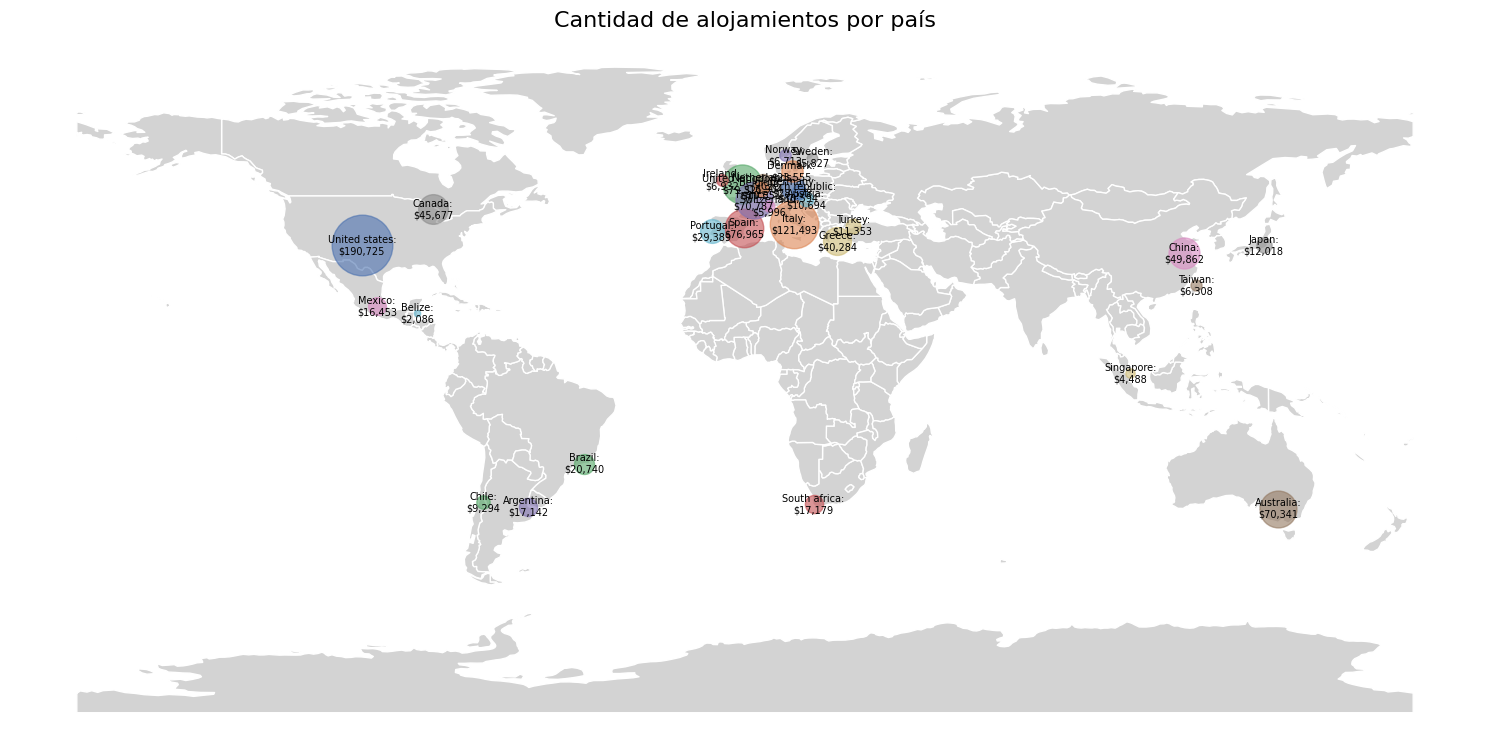

In [13]:
# Creamos una figura donde graficar:
fig, ax = plt.subplots(figsize=(15, 10))

# Importamos el mapamundi y lo graficamos:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)
world.plot(ax=ax, color='lightgrey', edgecolor='white')

# Obtenemos la información por país:
pais_counts = df_airbnb['country'].value_counts()
pais_colores = sns.color_palette('deep', len(pais_counts))
pais_color_map = dict(zip(pais_counts.index, pais_colores))

texto = []
for pais in pais_counts.index:
    texto.append(f"{pais}: {pais_counts[pais]}")

# Dibujamos una burbuja por cada país, con tamaño proporcional a la cantidad de alojamientos:
pais_counts = df_airbnb['country'].value_counts()
for pais, count in pais_counts.items():
    pais_data = df_airbnb[df_airbnb['country'] == pais]
    if not pais_data.empty:
        lat_mean = pais_data['latitude'].mean()
        lon_mean = pais_data['longitude'].mean()
        ax.scatter(lon_mean, lat_mean, s=count*.01, alpha=0.6, color=pais_color_map[pais])

# Anotamos el texto:
for pais in df_airbnb['country'].unique():
    x = df_airbnb[df_airbnb['country'] == pais]['longitude'].mean()
    y = df_airbnb[df_airbnb['country'] == pais]['latitude'].mean()
    txt = f"{pais}:\n${pais_counts[pais]:,}"
    ax.text(x, y, txt, fontsize=7, ha='center', va='center', color='black', weight='light')

# Estética final:
ax.set_title('Cantidad de alojamientos por país', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


Para visualizar mejor los datos, se presenta un gráfico de barras con la cantidad de alojamientos por país. Sin embargo, ya con esta visualización es facil leer que la mayoría de los alijamientos se ubican en Europa, pero que el país con más alojamientos es EEUU.

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3939772375.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pais_counts, x='country', y='total_alojamientos',


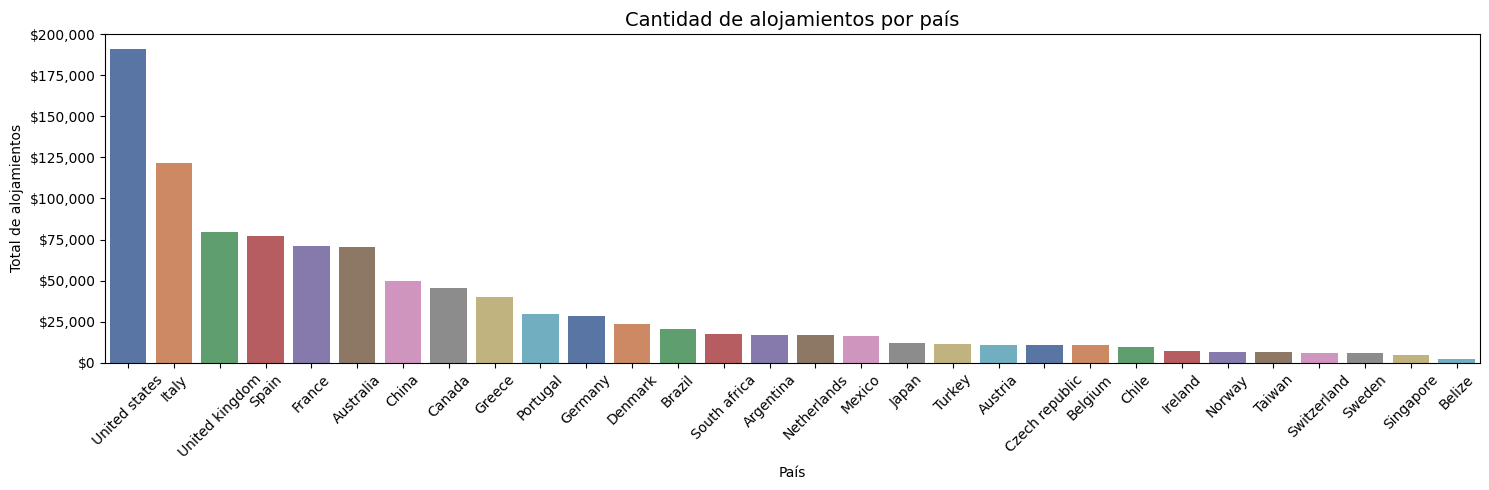

In [14]:
# Crear una nueva figura y eje para el gráfico de barras:
fig, ax = plt.subplots(figsize=(15, 5))

# Preparamos los datos:
pais_counts = df_airbnb['country'].value_counts().reset_index()
pais_counts.columns = ['country', 'total_alojamientos']

# Gráfico de barras para cantidad de alojamientos por país:
sns.barplot(data=pais_counts, x='country', y='total_alojamientos',
            palette='deep', ax=ax)

# Formatear el eje X para mostrar valores en dólares
formatter = FuncFormatter(lambda x, _: f'${int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Estética:
ax.set_title('Cantidad de alojamientos por país', fontsize=14)
ax.set_xlabel('País')
ax.set_ylabel('Total de alojamientos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las observaciones iniciales prevalecen, el país con más alojamientos registrados es EEUU, los siguientes 4 son países europeos (Italia, Reino Unido, España y Francia).

Lo anterior sugiere que estos mercados tienen una presencia significativa en la plataforma. Esta distribución no solo refleja el volumen de oferta, sino también posibles diferencias en la **madurez del mercado, el atractivo turístico o la penetración de Airbnb** en cada región.

Esta información es relevante para el proyecto porque:
- Permite priorizar el análisis por país en etapas posteriores, enfocándose en los mercados más representativos.
- Ayuda a contextualizar el comportamiento de los anfitriones según el entorno geográfico.
- Sienta las bases para comparar estrategias operativas entre regiones con alta y baja densidad de oferta.

Con esta base geográfica clara, podemos avanzar hacia el análisis de los anfitriones por país, lo que nos permitirá comenzar a perfilar distintos tipos de operadores.

#### 🧭 Anfitriones/Operadores por país.

Como segundo paso del análisis exploratorio, se visualizará la cantidad de anfitriones únicos que operan en cada país. Esta métrica permite dimensionar la presencia operativa en cada región y entender cómo se distribuyen los actores detrás de la oferta de alojamientos.

El gráfico elegido para esta visualización será un gráfico de barras horizontales, donde cada barra representa un país y su longitud está determinada por el número de anfitriones registrados. Este formato facilita la comparación directa entre países y permite identificar rápidamente aquellos con mayor densidad de operadores.

Este tipo de gráfico es especialmente útil en este contexto porque:
- Resalta diferencias operativas entre países, más allá del volumen de alojamientos.
- Permite detectar mercados con alta concentración de anfitriones, lo que puede reflejar modelos de negocio más atomizados o más profesionalizados.
- Establece una base para segmentar operadores según su ubicación geográfica, lo que será clave en el desarrollo del modelo de clasificación.

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\4019008389.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=host_por_pais, y='country', x='total_anfitriones', palette='deep', ax=ax)


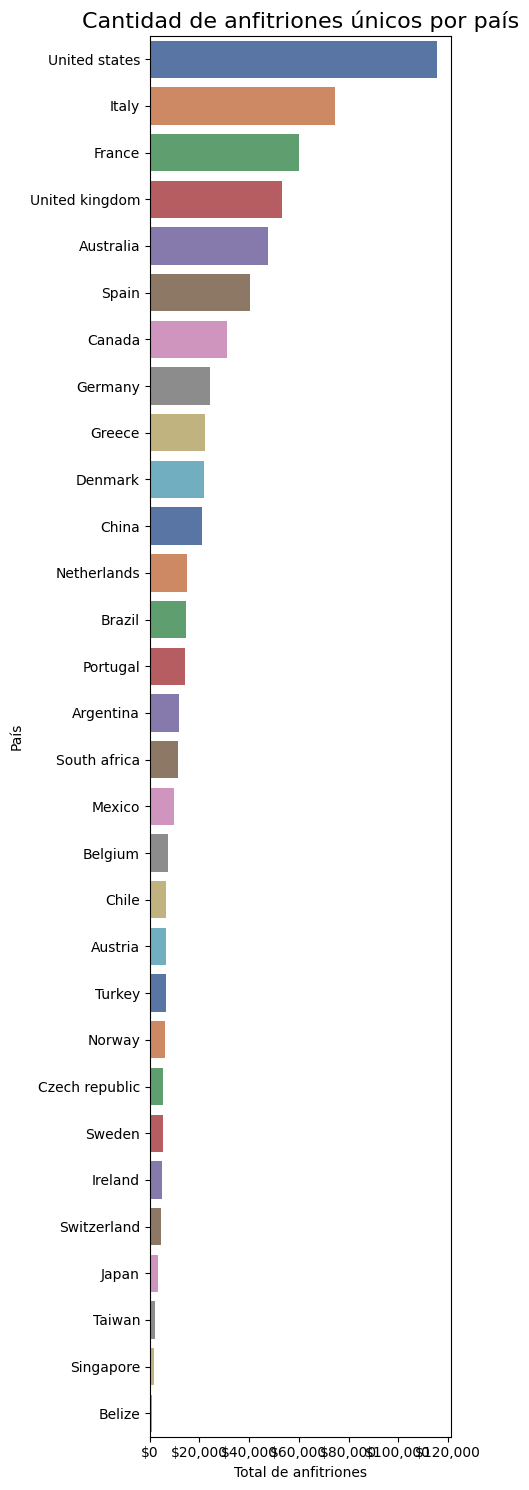

In [15]:
# Agrupar anfitriones únicos por país:
host_por_pais = df_airbnb.groupby('country')['host_id'].nunique().reset_index()
host_por_pais = host_por_pais.sort_values(by='host_id', ascending=False)
host_por_pais.columns = ['country', 'total_anfitriones']

# Crear gráfico de barras horizontales:
fig, ax = plt.subplots(figsize=(5, 15))
sns.barplot(data=host_por_pais, y='country', x='total_anfitriones', palette='deep', ax=ax)

# Formatear el eje X para mostrar valores en dólares
formatter = FuncFormatter(lambda x, _: f'${int(x):,}')
ax.xaxis.set_major_formatter(formatter)

# Estética del gráfico
ax.set_title('Cantidad de anfitriones únicos por país', fontsize=16)
ax.set_xlabel('Total de anfitriones')
ax.set_ylabel('País')
plt.tight_layout()
plt.show()


El análisis revela que países como Estados Unidos, Italia, Francia, Reino Unido y Australia concentran el mayor número de anfitriones únicos en el conjunto de datos. Esta distribución sugiere una fuerte participación operativa en estos mercados, posiblemente vinculada a una mayor penetración de la plataforma, dinamismo turístico o modelos de negocio más consolidados.

Es importante destacar que el orden de los países con más anfitriones **no coincide** con el de aquellos con más alojamientos. En particular, España, que figuraba en el Top 5 por cantidad de alojamientos, queda fuera al analizar anfitriones únicos, mientras que Australia asciende al grupo principal. Esto sugiere que en **algunos países la oferta está más concentrada en menos operadores**, mientras que en otros existe una base más amplia de anfitriones individuales. Esta distinción será clave para entender el perfil operativo de los anfitriones y avanzar hacia una clasificación más precisa en etapas posteriores del proyecto.

#### 💰 Precio mínimo promedio por país:

En esta tercera etapa del análisis, se calculará el precio mínimo promedio de los alojamientos en cada país. Esta métrica permite identificar diferencias en las estrategias de precios entre regiones, lo que puede estar influenciado por factores como el nivel de demanda, el poder adquisitivo local, el tipo de alojamiento predominante o el perfil de los operadores.

El gráfico elegido para esta visualización será un gráfico de barras horizontales, donde cada barra representa un país y su longitud corresponde al precio mínimo promedio de sus alojamientos. Este formato facilita la comparación directa entre países y permite detectar rápidamente aquellos con precios más altos o más accesibles.

Este tipo de gráfico es especialmente útil en este contexto porque:
* Resalta diferencias económicas entre mercados, lo que puede influir en el comportamiento de los anfitriones.
* Permite detectar outliers o estrategias de precios atípicas, útiles para análisis posteriores.
* Contribuye a perfilar el entorno operativo de cada país, lo que será clave para segmentar anfitriones según contexto geográfico y económico.

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\1791868623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_promedio, x='country', y='precio_minimo_promedio', palette='deep', ax=ax)


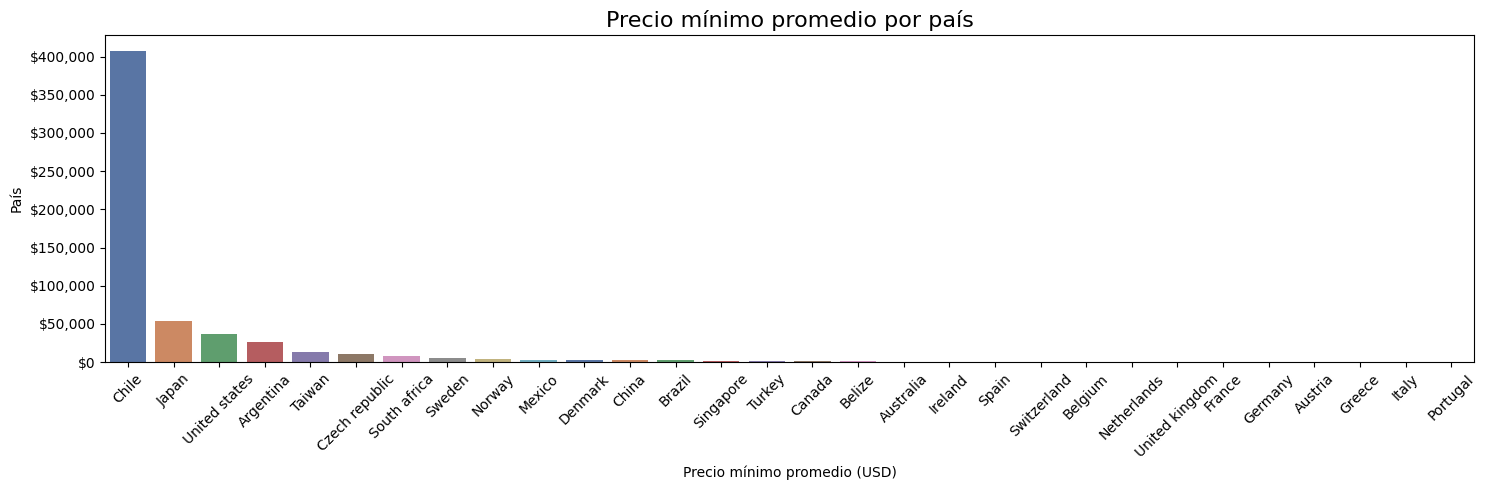

In [16]:
# Agrupar el precio mínimo promedio por país
precio_promedio = df_airbnb.groupby('country')['real_min_price'].mean().reset_index()
precio_promedio = precio_promedio.sort_values(by='real_min_price', ascending=False)
precio_promedio.columns = ['country', 'precio_minimo_promedio']

# Crear gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=precio_promedio, x='country', y='precio_minimo_promedio', palette='deep', ax=ax)

# Formatear el eje X para mostrar valores en dólares
formatter = FuncFormatter(lambda x, _: f'${int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Estética del gráfico
ax.set_title('Precio mínimo promedio por país', fontsize=16)
ax.set_xlabel('Precio mínimo promedio (USD)')
ax.set_ylabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si bien el dataset incluye `price` como precio por noche, para este análisis utilizamos la variable calculada `real_min_price` porque incorpora la condición de noches mínimas requeridas para reservar. Esto refleja el desembolso efectivo que un huésped debe realizar para acceder al alojamiento, ofreciendo una métrica más realista y comparable del umbral de entrada de precio entre países y operadores.

Aunque el gráfico de barras permite visualizar el precio mínimo promedio por país, se observa que algunos valores —como el caso de Chile— presentan picos que no parecen razonables ni representativos del comportamiento general. Esto puede deberse a valores **atípicos (outliers)** que distorsionan el promedio y afectan la interpretación.

Para abordar esta limitación, se utilizará un gráfico de **cajas y bigotes (boxplot)** que permite visualizar la distribución completa de precios por país, incluyendo:
- El rango intercuartílico (IQR).
- La mediana.
- Los valores extremos.

Este tipo de visualización es útil para:
- Detectar outliers que inflan o sesgan el promedio.
- Comparar la dispersión de precios entre países.
- Evaluar la simetría o concentración de los datos en cada región.

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\4043506445.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


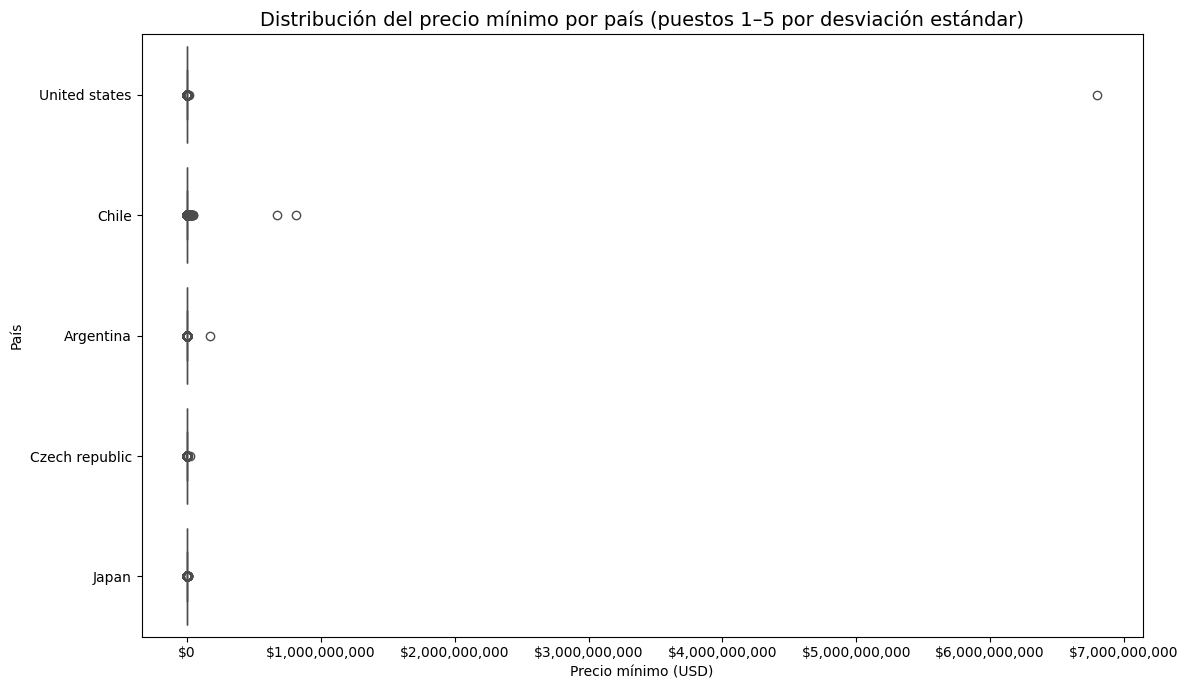

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\4043506445.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


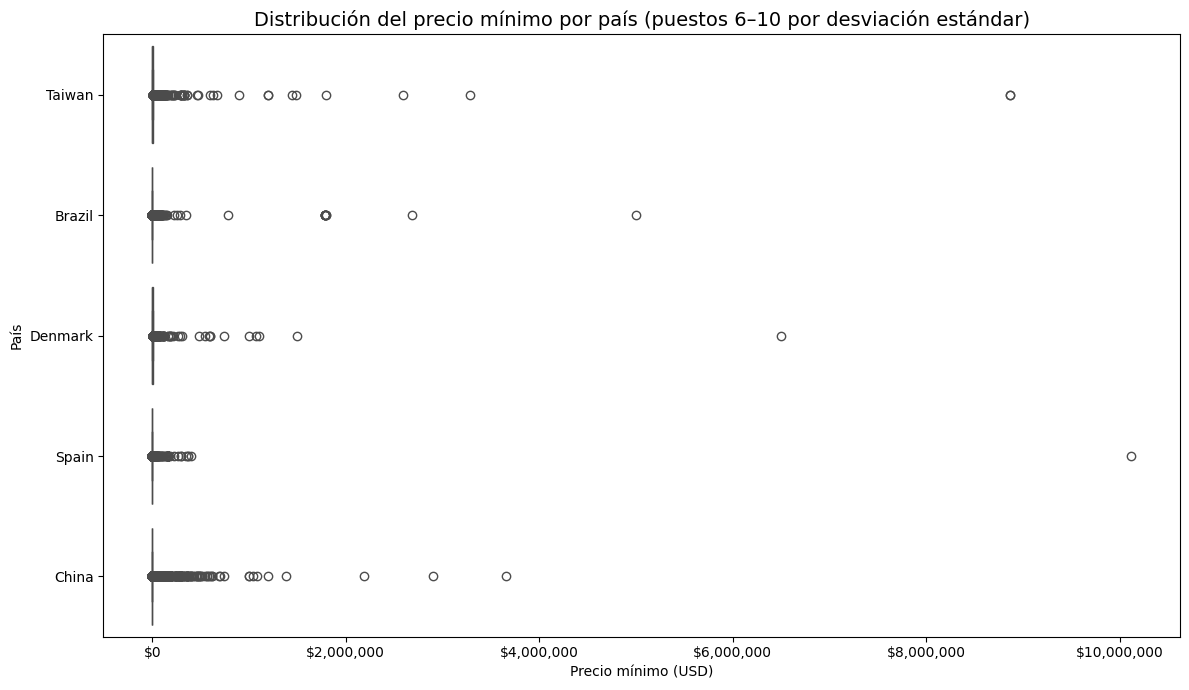

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\4043506445.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


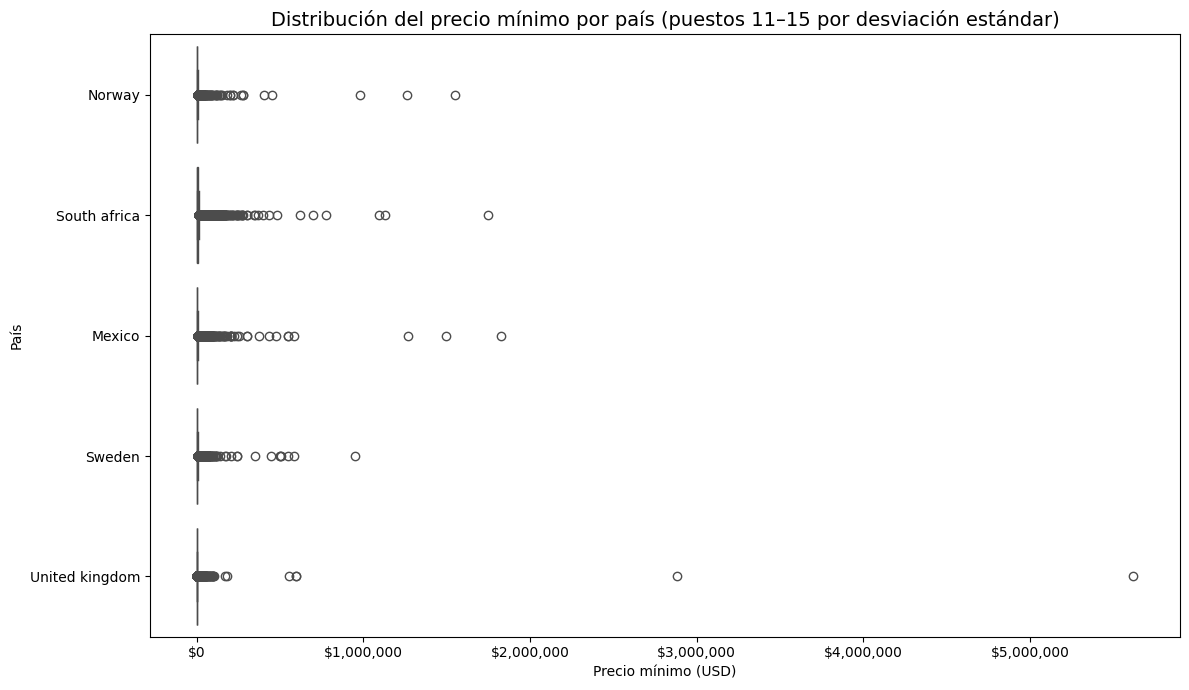

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\4043506445.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


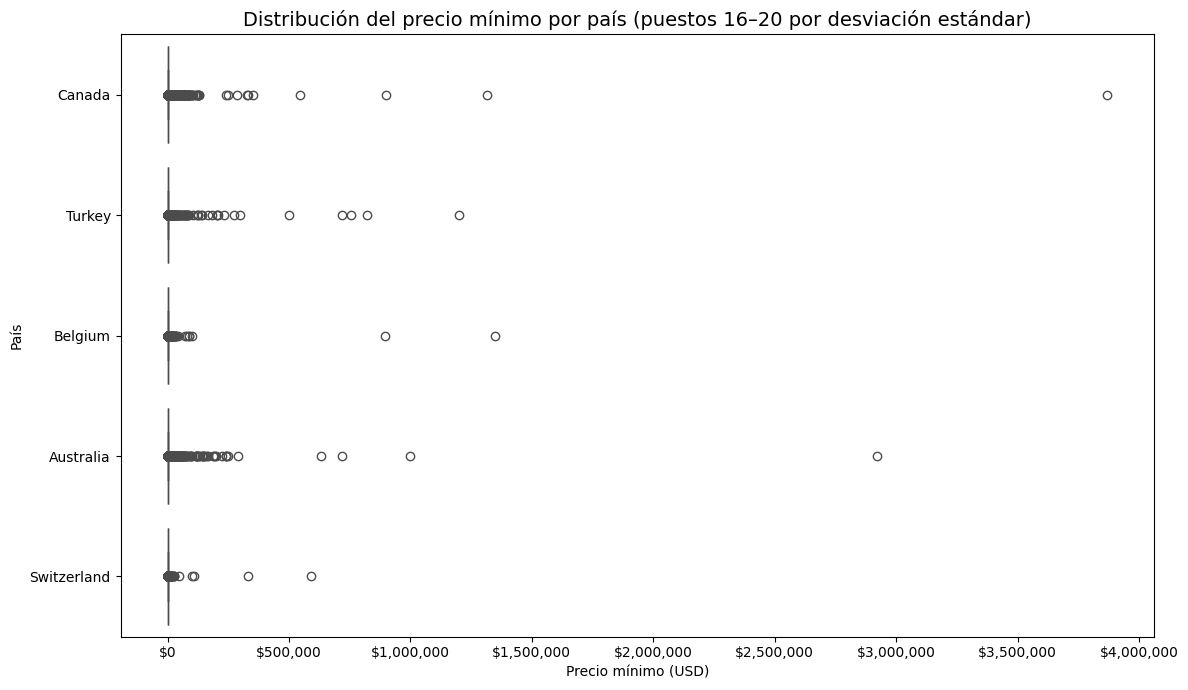

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\4043506445.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


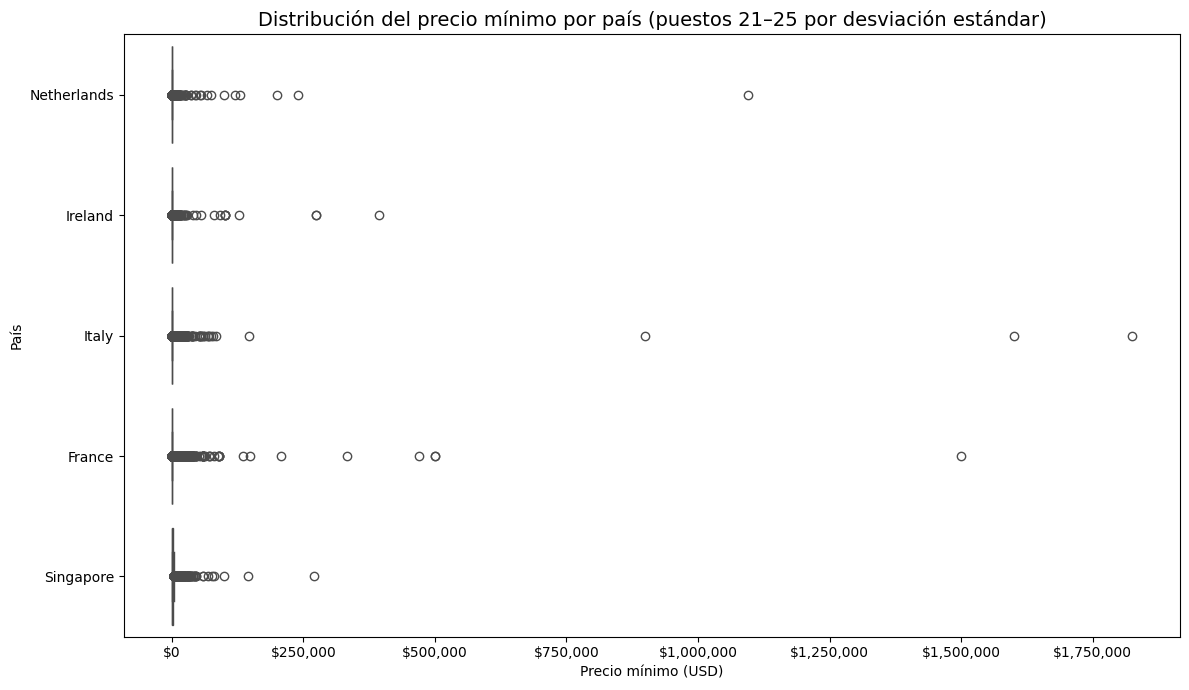

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\4043506445.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


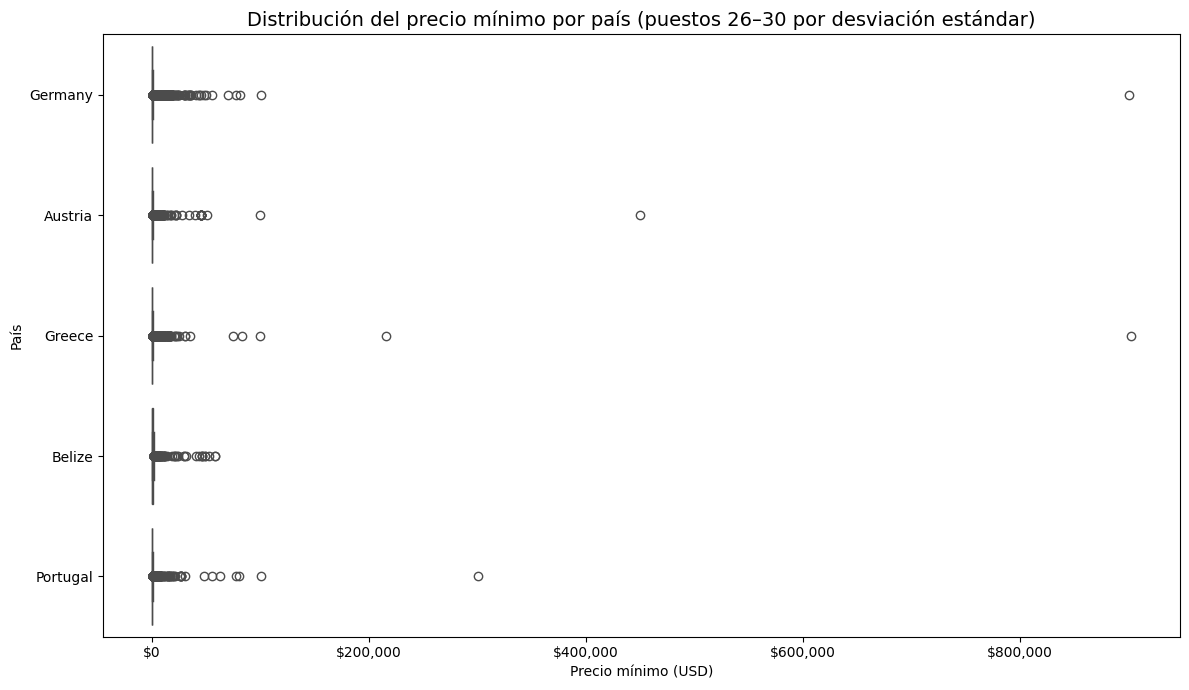

In [17]:
# Parámetros base:
metric_col = 'real_min_price'
group_col = 'country'
pais_per_graph = 5
palette = 'deep'

# Orden de países por desviación estándar (de mayor a menor):
stats = (
    df_airbnb
    .groupby(group_col)[metric_col]
    .agg(std='std', count='count')
    .reset_index()
    .sort_values('std', ascending=False)
)
ordered_countries = stats[group_col].tolist()

# Loop en páginas de 5 países:
n = len(ordered_countries)
for start in range(0, n, pais_per_graph):
    batch = ordered_countries[start:start + pais_per_graph]
    df_batch = df_airbnb[df_airbnb[group_col].isin(batch)].copy()
    
    # Asegurar el orden en el eje Y según la desv std:
    df_batch[group_col] = pd.Categorical(df_batch[group_col], categories=batch, ordered=True)
    
    # Crear la figura:
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.boxplot(
        data=df_batch,
        x=metric_col, y=group_col,
        palette=palette, ax=ax
    )
    
    # Formato del eje X en dólares:
    formatter = FuncFormatter(lambda x, _: f'${int(x):,}')
    ax.xaxis.set_major_formatter(formatter)
    
    # Títulos y estética:
    rank_range = f"{start+1}–{min(start+pais_per_graph, n)}"
    ax.set_title(f'Distribución del precio mínimo por país (puestos {rank_range} por desviación estándar)', fontsize=14)
    ax.set_xlabel('Precio mínimo (USD)')
    ax.set_ylabel('País')
    plt.tight_layout()
    plt.show()

Los gráficos de cajas y bigotes revelan que en prácticamente todos los países existen **valores atípicos (outliers)** que distorsionan la escala y comprimen la caja en una línea casi imperceptible. Esta situación dificulta la interpretación visual y oculta la estructura real de la distribución.

Para resolverlo, se propone **filtrar los datos por país utilizando el rango intercuartílico (IQR)**, conservando únicamente los valores que se encuentran entre el primer y tercer cuartil. Esta técnica permite:
* Eliminar outliers de forma robusta y estadísticamente fundamentada.
* Visualizar con claridad la concentración de precios en cada país.
* Comparar distribuciones reales sin distorsión, lo que mejora la calidad del análisis exploratorio.

Este enfoque no modifica los datos originales, sino que mejora su representación gráfica para facilitar la lectura y la toma de decisiones.

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(grupo, group_keys=False).apply(aplicar_iqr)
C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_batch_filtrado, x=metric_col, y=group_col, palette=palette, ax=ax)


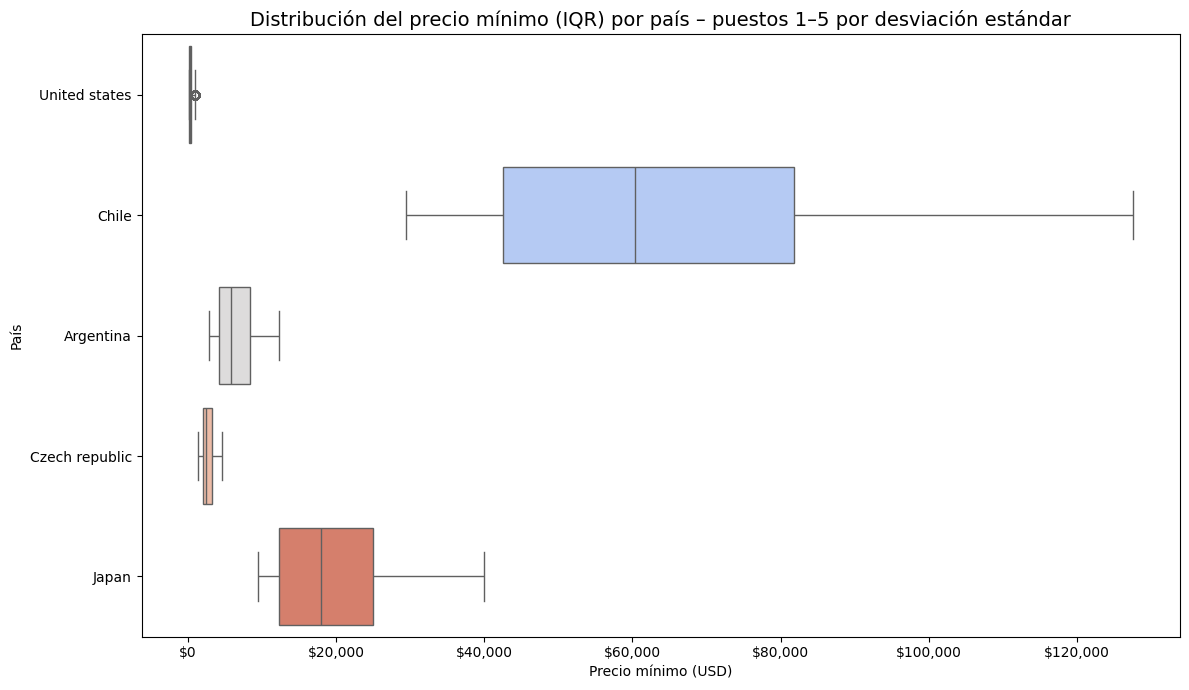

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(grupo, group_keys=False).apply(aplicar_iqr)
C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_batch_filtrado, x=metric_col, y=group_col, palette=palette, ax=ax)


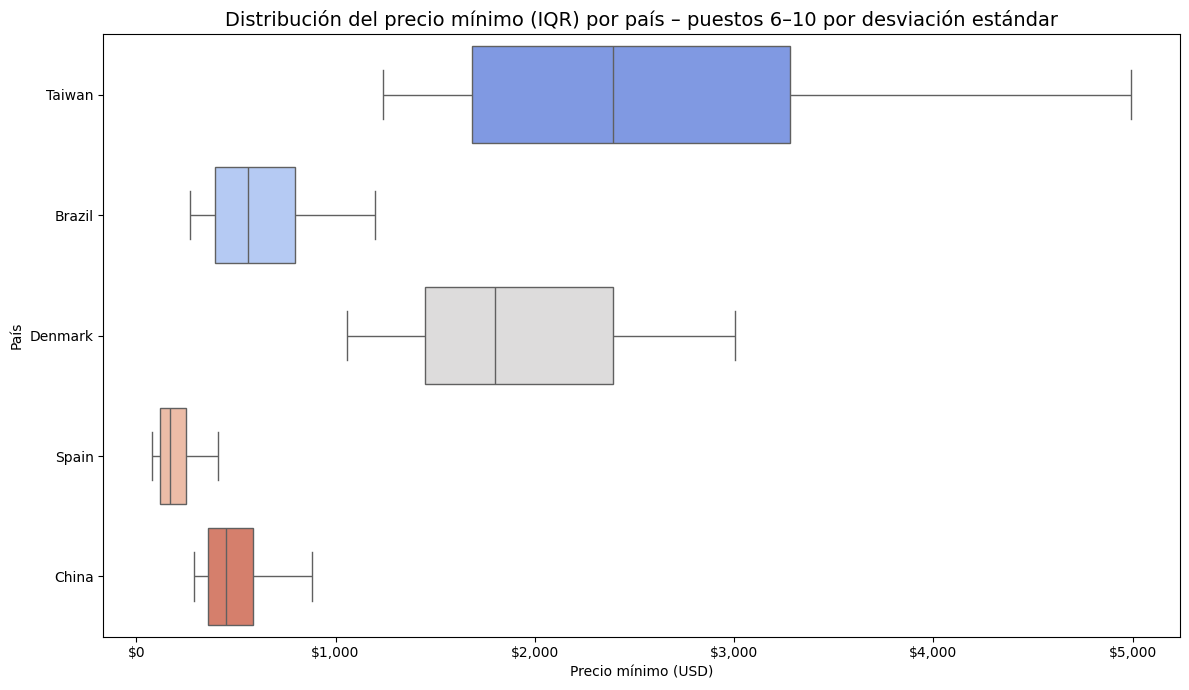

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(grupo, group_keys=False).apply(aplicar_iqr)
C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_batch_filtrado, x=metric_col, y=group_col, palette=palette, ax=ax)


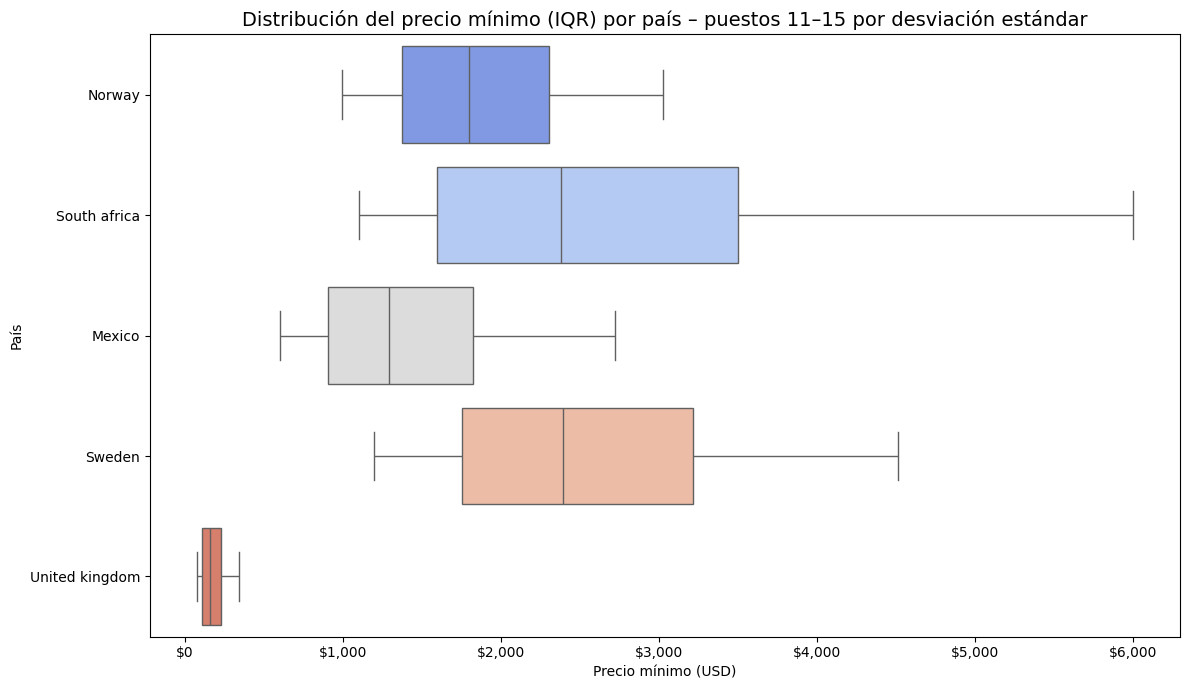

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(grupo, group_keys=False).apply(aplicar_iqr)
C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_batch_filtrado, x=metric_col, y=group_col, palette=palette, ax=ax)


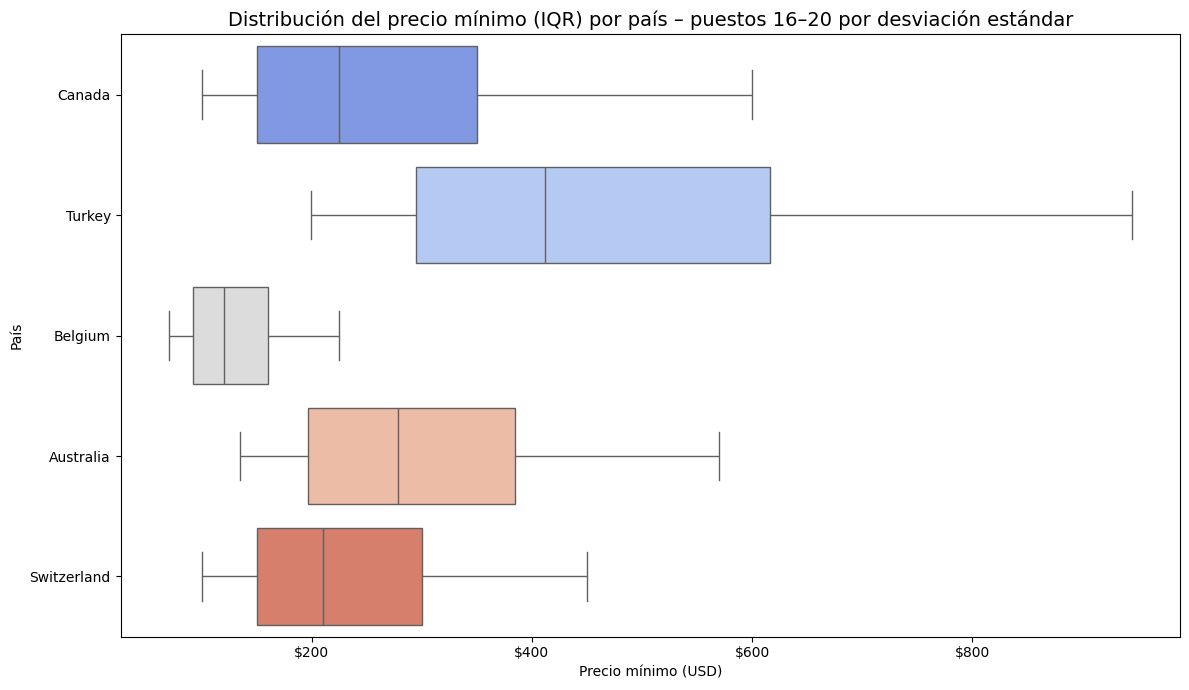

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(grupo, group_keys=False).apply(aplicar_iqr)
C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_batch_filtrado, x=metric_col, y=group_col, palette=palette, ax=ax)


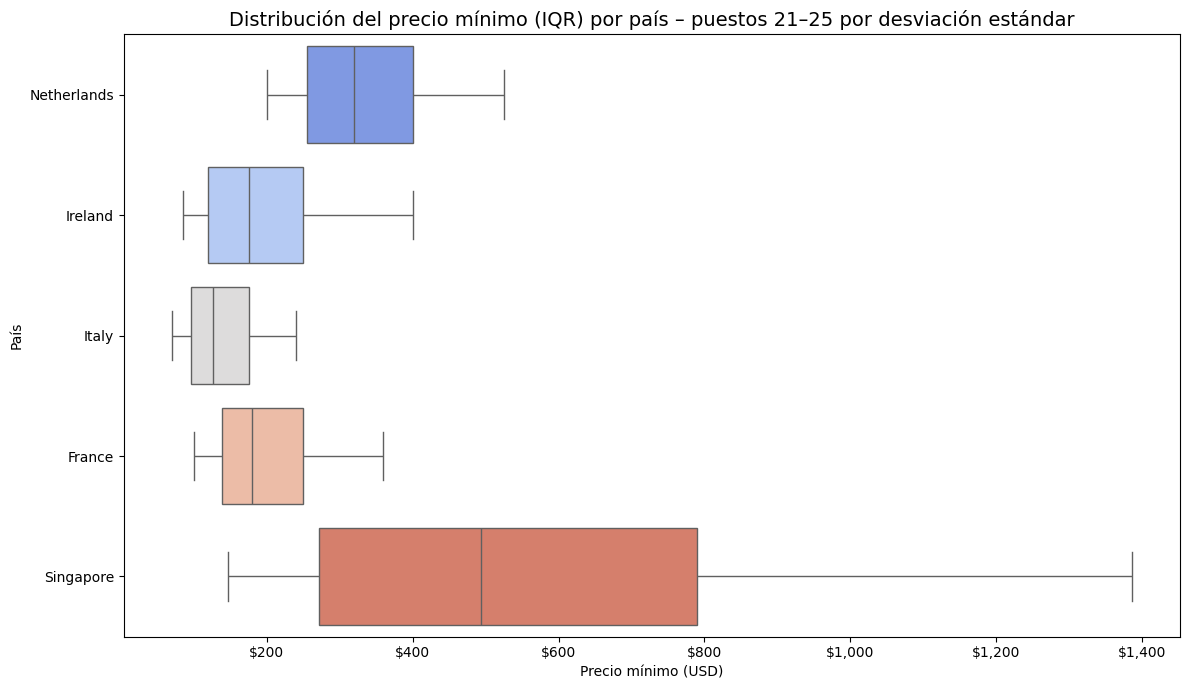

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(grupo, group_keys=False).apply(aplicar_iqr)
C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3795858747.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_batch_filtrado, x=metric_col, y=group_col, palette=palette, ax=ax)


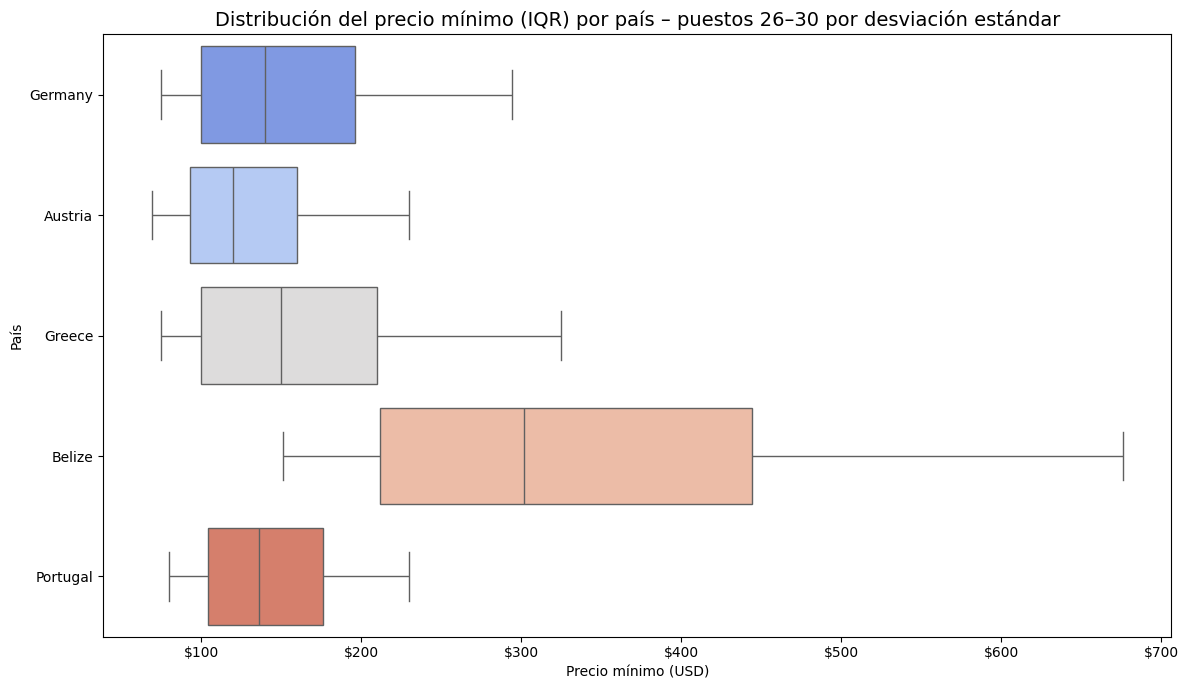

In [18]:
# Parámetros base:
metric_col = 'real_min_price'
group_col = 'country'
page_size = 5
palette = 'coolwarm'

# Función para filtrar por IQR por país
def filtrar_por_iqr(df, col, grupo):
    def aplicar_iqr(subdf):
        q1 = subdf[col].quantile(0.25)
        q3 = subdf[col].quantile(0.75)
        iqr = q3 - q1
        return subdf[(subdf[col] >= q1) & (subdf[col] <= q3)]
    return df.groupby(grupo, group_keys=False).apply(aplicar_iqr)

# Ordenar países por desviación estándar
std_por_pais = df_airbnb.groupby(group_col)[metric_col].std().reset_index()
std_por_pais.columns = [group_col, 'std']
ordered_countries = std_por_pais.sort_values('std', ascending=False)[group_col].tolist()

# Formateador en dólares
formatter = FuncFormatter(lambda x, _: f'${int(x):,}')

# Loop en páginas de 5 países
n = len(ordered_countries)
for start in range(0, n, page_size):
    batch = ordered_countries[start:start + page_size]
    df_batch = df_airbnb[df_airbnb[group_col].isin(batch)].copy()
    
    # Filtrar por IQR
    df_batch_filtrado = filtrar_por_iqr(df_batch, metric_col, group_col)
    
    # Asegurar orden en el eje Y
    df_batch_filtrado[group_col] = pd.Categorical(df_batch_filtrado[group_col], categories=batch, ordered=True)
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.boxplot(data=df_batch_filtrado, x=metric_col, y=group_col, palette=palette, ax=ax)
    
    ax.xaxis.set_major_formatter(formatter)
    rank_range = f"{start+1}–{min(start+page_size, n)}"
    ax.set_title(f'Distribución del precio mínimo (IQR) por país – puestos {rank_range} por desviación estándar', fontsize=14)
    ax.set_xlabel('Precio mínimo (USD)')
    ax.set_ylabel('País')
    plt.tight_layout()
    plt.show()

Para concluir con este análisis, es práctico visualizar la información en un formato de tabla.

In [19]:
# Agrupar métricas por país usando 'room_id' como conteo:
resumen_paises = (
    df_airbnb
    .groupby('country')
    .agg(
        Alojamientos=('room_id', 'count'),
        Prom_precio_min_real=('real_min_price', 'mean'),
        Desv_std_precio_min_real=('real_min_price', 'std')
    )
    .reset_index()
)

# Renombrar columna de país:
resumen_paises = resumen_paises.rename(columns={'country': 'País'})

# Ordenar por cantidad de alojamientos:
resumen_paises = resumen_paises.sort_values(by='Desv_std_precio_min_real', ascending=False)

# Formatear columnas monetarias:
resumen_paises['Prom. Precio Mín. Real'] = resumen_paises['Prom_precio_min_real'].apply(lambda x: f"${x:,.2f}")
resumen_paises['Desv. Std. Precio Mín. Real'] = resumen_paises['Desv_std_precio_min_real'].apply(lambda x: f"${x:,.2f}")

# Eliminar columnas intermedias:
resumen_paises = resumen_paises[['País', 'Alojamientos', 'Prom. Precio Mín. Real', 'Desv. Std. Precio Mín. Real']]

# Mostrar tabla:
resumen_paises

,País,Alojamientos,Prom. Precio Mín. Real,Desv. Std. Precio Mín. Real
29,United states,190725,"$37,176.78","$15,570,632.09"
7,Chile,9294,"$407,413.98","$11,071,784.63"
0,Argentina,17142,"$26,267.57","$1,337,681.90"
9,Czech republic,10594,"$10,712.70","$241,218.60"
16,Japan,12018,"$53,385.39","$178,639.76"
26,Taiwan,6308,"$12,884.97","$173,458.52"
5,Brazil,20740,"$2,582.81","$53,359.51"
10,Denmark,23555,"$3,355.96","$46,428.33"
23,Spain,76965,$709.88,"$36,735.36"
8,China,49862,"$2,726.65","$31,367.90"


El análisis de la distribución del precio mínimo real revela que **Chile y Argentina** presentan valores **atípicos (outliers) de gran magnitud** que inflan significativamente el promedio. 

Esta situación genera una **incongruencia** respecto a hallazgos anteriores y a las condiciones económicas reales de ambos países, especialmente si se comparan con naciones que muestran promedios más bajos pero mayor estabilidad en su dispersión. Una posible explicación es que ciertos alojamientos están orientados al **turismo internacional**, con precios ajustados a visitantes de mayor poder adquisitivo. Sin embargo, al no contar con información sobre el origen de los huéspedes, esta hipótesis no puede ser validada en este proyecto.

En el caso de **Estados Unidos**, también se observan **outliers importantes**, pero dada la diversidad regional, el peso económico del país y su rol como destino turístico global, esta variabilidad podría tener fundamentos más sólidos. Aun así, la amplitud de la dispersión sugiere que el análisis por segmentos o regiones dentro del país podría aportar mayor claridad, especialmente si se dispone de variables adicionales como tipo de alojamiento, ubicación o perfil del anfitrión.

La desviación estándar del precio mínimo real emerge como una **métrica crítica** para entender la variabilidad operativa en cada país. No solo permite detectar mercados con alta dispersión, sino que también alerta sobre posibles inconsistencias en el registro o en la estrategia de precios.

La presencia sistemática de outliers en múltiples países sugiere que el **promedio por sí solo no es una métrica confiable** para comparar mercados. En su lugar, el uso combinado de mediana, IQR y desviación estándar ofrece una visión más robusta y contextualizada.

Países con alta dispersión pero bajo volumen de alojamientos (como Chile) podrían requerir un **tratamiento especial en la segmentación**, ya sea excluyendo valores extremos o analizando casos individuales que distorsionan el comportamiento general.

Finalmente, este análisis refuerza la **necesidad de contar con variables complementarias** (como tipo de huésped, ubicación exacta o tipo de propiedad) para interpretar correctamente los patrones de precios y evitar conclusiones sesgadas por agregados estadísticos.

#### 🧑‍💼 Alojamientos totales por anfitrión/operador.

En esta etapa se analizará la cantidad de alojamientos que gestiona cada operador, definido por su identificador único host_id. Esta métrica permite identificar el grado de concentración operativa dentro de la plataforma, diferenciando entre anfitriones individuales y operadores comerciales que gestionan múltiples propiedades.

Este análisis es relevante porque permite distinguir entre distintos modelos de negocio:
- Operadores con un solo alojamiento, posiblemente anfitriones ocasionales o particulares.
- Operadores con múltiples alojamientos, que podrían representar empresas, gestores profesionales o actores institucionales.
- Patrones de concentración que pueden influir en la dinámica de precios, disponibilidad y competencia.

El gráfico elegido será un histograma, donde el eje X representa la cantidad de alojamientos gestionados por cada operador, y el eje Y indica cuántos operadores caen en cada categoría. Este tipo de visualización es útil porque:
- Permite detectar la distribución real del mercado entre operadores pequeños y grandes.
- Ayuda a identificar posibles outliers o actores dominantes.
- Sienta las bases para segmentar operadores en futuras actividades, como análisis de precios, disponibilidad o reseñas.

Adicional al gráfico y para dar mayor profundidad a la comprensión del perfil del operador, se contarán el número de operadores que tienen alojamientos en más de un país y se presentará la información en una tabla.

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\3713955402.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_bins, x='Rango de alojamientos', y='Porcentaje de operadores', palette='rocket', ax=ax)


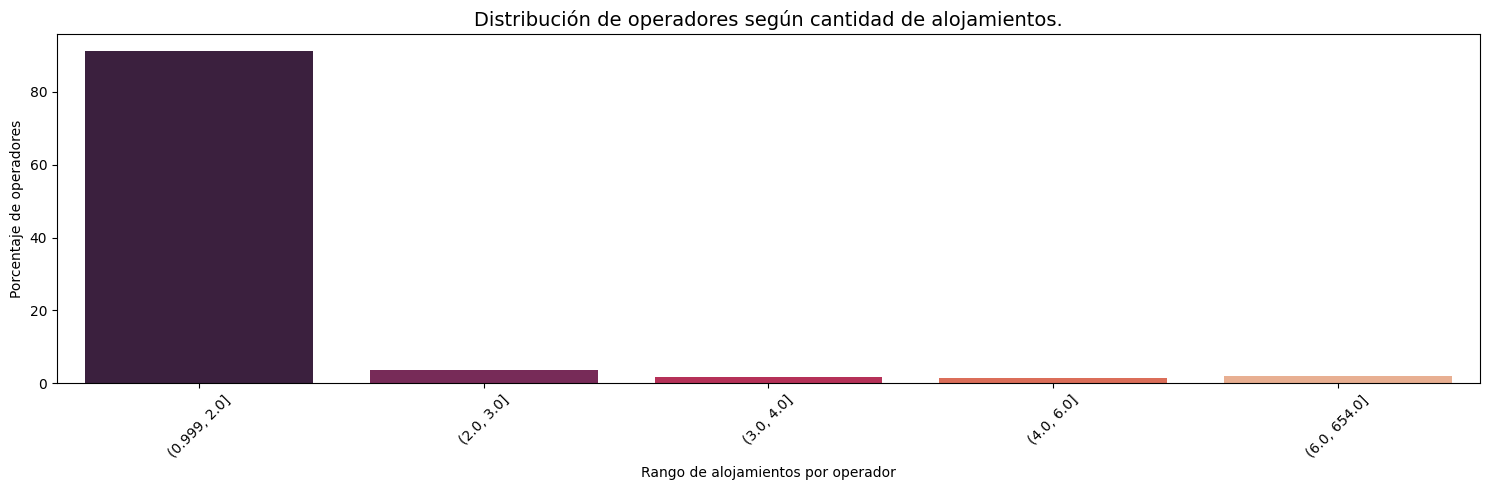

In [20]:
# Agrupar cantidad de alojamientos por operador:
alojamientos_por_operador = (
    df_airbnb
    .groupby('host_id')['room_id']
    .count()
    .reset_index()
    .rename(columns={'room_id': 'Alojamientos'})
)

# Calcular percentiles y eliminar duplicados:
percentiles = np.percentile(alojamientos_por_operador['Alojamientos'], np.linspace(0, 100, 50))
percentiles = np.unique(percentiles)  # Evita bordes duplicados.

# Asignar cada operador a un bin según su cantidad de alojamientos:
alojamientos_por_operador['Bin'] = pd.cut(
    alojamientos_por_operador['Alojamientos'],
    bins=percentiles,
    include_lowest=True
)

# Contar operadores por bin y calcular porcentaje
conteo_bins = (
    alojamientos_por_operador['Bin']
    .value_counts(normalize=True)
    .sort_index()
    .reset_index()
    .rename(columns={'Bin': 'Rango de alojamientos', 'proportion': 'Porcentaje de operadores'})
)

conteo_bins['Porcentaje de operadores'] = conteo_bins['Porcentaje de operadores'] * 100

# Graficar histograma por rangos únicos
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=conteo_bins, x='Rango de alojamientos', y='Porcentaje de operadores', palette='rocket', ax=ax)

# Estética del gráfico:
ax.set_title('Distribución de operadores según cantidad de alojamientos.', fontsize=14)
ax.set_xlabel('Rango de alojamientos por operador')
ax.set_ylabel('Porcentaje de operadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico anterior permite observar con claridad la alta concentración de operadores en rangos bajos de actividad. **Más del 90% de los operadores gestionan hasta dos alojamientos**, lo que sugiere una predominancia de **perfiles ocasionales o particulares**. En contraste, los operadores con más de cuatro alojamientos representan un porcentaje marginal, lo que refuerza la idea de que el mercado está compuesto mayoritariamente por actores individuales, con muy pocos operadores gestionando propiedades a escala comercial.

Este hallazgo será clave para definir categorías operativas más adelante, ya que permite segmentar con base en evidencia empírica y no en supuestos previos.

La siguiente tabla refuerza los hallazgos.

In [21]:
# Agrupar cantidad de alojamientos por operador:
alojamientos_por_operador = (
    df_airbnb
    .groupby('host_id')['room_id']
    .count()
    .reset_index()
    .rename(columns={'room_id': 'Cantidad de alojamientos'})
)

# Crear columna de categoría:
def clasificar_alojamientos(n):
    if n == 1:
        return '1 alojamiento'
    elif n == 2:
        return '2 alojamientos'
    elif n == 3:
        return '3 alojamientos'
    elif n == 4:
        return '4 alojamientos'
    else:
        return 'Más de 4 alojamientos'

alojamientos_por_operador['Categoría'] = alojamientos_por_operador['Cantidad de alojamientos'].apply(clasificar_alojamientos)

# Contar operadores por categoría:
tabla_resumen = (
    alojamientos_por_operador['Categoría']
    .value_counts()
    .reset_index()
    .rename(columns={'Categoría': 'Cantidad de alojamientos', 'count': 'Número de operadores'})
)

# Calcular porcentaje:
tabla_resumen['Porcentaje'] = (tabla_resumen['Número de operadores'] / tabla_resumen['Número de operadores'].sum()) * 100
tabla_resumen['Porcentaje'] = tabla_resumen['Porcentaje'].round(2)

# Mostrar tabla ordenada:
tabla_resumen = tabla_resumen.sort_values(by='Cantidad de alojamientos')
tabla_resumen

,Cantidad de alojamientos,Número de operadores,Porcentaje
0,1 alojamiento,519099,80.11
1,2 alojamientos,71852,11.09
2,3 alojamientos,23873,3.68
4,4 alojamientos,11089,1.71
3,Más de 4 alojamientos,22054,3.40


Con la información del gráfico y de la tabla, podemos empezar a vislumbrar **3 categorías de operadores**, aquellos con un solo alojamiento registrado, quienes tienen 2 a 4 y quienes tienen más de 4 alojamientos.

In [22]:
# Obtener países únicos por operador:
operadores_por_pais = (
    df_airbnb[['host_id', 'country']]
    .drop_duplicates()
    .groupby('host_id')['country']
    .nunique()
    .reset_index()
    .rename(columns={'country': 'Cantidad de países'})
)

# Clasificar operadores según cobertura:
def clasificar_cobertura(n):
    if n == 1:
        return '1 país'
    elif n == 2:
        return '2 países'
    else:
        return 'Más de 2 países'

operadores_por_pais['Cobertura'] = operadores_por_pais['Cantidad de países'].apply(clasificar_cobertura)

# Contar operadores por categoría:
tabla_cobertura = (
    operadores_por_pais['Cobertura']
    .value_counts()
    .reset_index()
    .rename(columns={'Cobertura': 'Cobertura geográfica', 'count': 'Número de operadores'})
)

#print(tabla_cobertura)

# Calcular porcentaje:
tabla_cobertura['Porcentaje'] = (
    tabla_cobertura['Número de operadores'] / tabla_cobertura['Número de operadores'].sum()
) * 100
tabla_cobertura['Porcentaje'] = tabla_cobertura['Porcentaje'].round(2)

# Mostrar tabla ordenada:
tabla_cobertura = tabla_cobertura.sort_values(by='Cobertura geográfica')
tabla_cobertura

,Cobertura geográfica,Número de operadores,Porcentaje
0,1 país,646529,99.78
1,2 países,1402,0.22
2,Más de 2 países,36,0.01


Nuevamente, agrupando a los operadores por la cantidad de países en los que tienen alojamientos registrados, resulta interesante agruparlos en los 3 conjuntos que se presentan en la tabla anterior. Por otro lado, es casi lógico asumir que los operadores con alojamientos en **más de un país** son operadores **profesionales** o **intensivos** por la naturaleza de las actividades que implica el tener presencia en más de un país, como por ejemplo:
* Atención a la normatividad y legislación vigente.
* Contactos para brindar servicios a los alojamientos (limpieza, agua, luz, gas, televisión, internet, etc.).
* Disposición y personal para brindar una atención personalizada y de calidad.

#### 💰 Precio mínimo promedio por operador.

En esta etapa se analizará el precio mínimo promedio que cada operador ofrece en sus alojamientos. Esta métrica permite identificar diferencias en la estrategia de precios entre operadores individuales y aquellos que gestionan múltiples propiedades.

Este análisis es relevante porque:
- Permite detectar operadores con precios sistemáticamente bajos o altos.
- Ayuda a identificar posibles modelos de negocio (por ejemplo, operadores intensivos con precios competitivos).
- Facilita la segmentación posterior por perfil operativo y posicionamiento en el mercado.

El gráfico elegido será un histograma, donde el eje X representa el precio mínimo promedio por operador, y el eje Y indica cuántos operadores se encuentran en cada rango de precios. Este tipo de visualización es útil porque:
- Muestra la dispersión de precios entre operadores.
- Permite detectar outliers o estrategias diferenciadas.
- Complementa el análisis de cantidad de alojamientos, aportando una dimensión económica clave para entender el comportamiento de la oferta.

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\419158074.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_bins, x='Rango de precios', y='Porcentaje de operadores', palette='rocket', ax=ax)


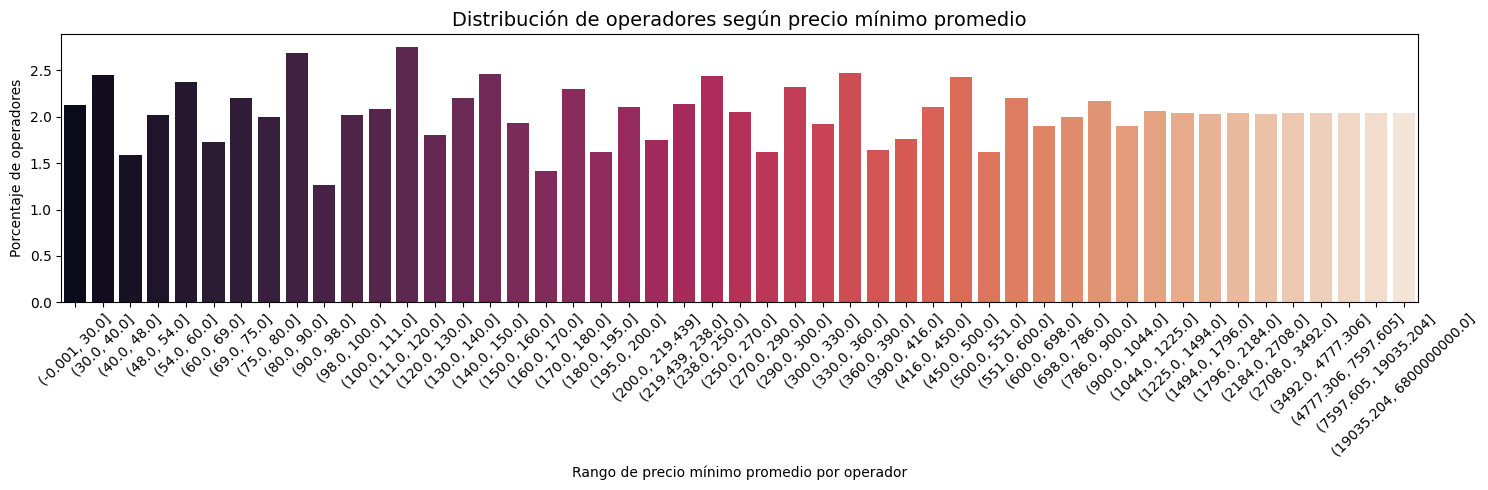

In [23]:
# Calcular el precio mínimo promedio por operador:
precio_por_operador = (
    df_airbnb
    .groupby('host_id')['real_min_price']
    .mean()
    .reset_index()
    .rename(columns={'real_min_price': 'Precio mínimo promedio'})
)

# Calcular percentiles y eliminar duplicados:
percentiles = np.percentile(precio_por_operador['Precio mínimo promedio'], np.linspace(0, 100, 50))
percentiles = np.unique(percentiles)  # Evita bordes duplicados.

# Asignar cada operador a un bin según su precio promedio:
precio_por_operador['Bin'] = pd.cut(
    precio_por_operador['Precio mínimo promedio'],
    bins=percentiles,
    include_lowest=True
)

# Contar operadores por bin y calcular porcentaje:
conteo_bins = (
    precio_por_operador['Bin']
    .value_counts(normalize=True)
    .sort_index()
    .reset_index()
    .rename(columns={'Bin': 'Rango de precios', 'proportion': 'Porcentaje de operadores'})
)
conteo_bins['Porcentaje de operadores'] = conteo_bins['Porcentaje de operadores'] * 100

# Graficar histograma por rangos únicos:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=conteo_bins, x='Rango de precios', y='Porcentaje de operadores', palette='rocket', ax=ax)

# Estética del gráfico:
ax.set_title('Distribución de operadores según precio mínimo promedio', fontsize=14)
ax.set_xlabel('Rango de precio mínimo promedio por operador')
ax.set_ylabel('Porcentaje de operadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aplicando el mismo procedimiento para graficar el histograma del precio mínimo promedio por operador, se observa una distribución mucho más uniforme en comparación con la cantidad de alojamientos. En este caso, los operadores se dispersan de manera más continua a lo largo de los rangos de precios, lo que permite generar una mayor cantidad de cortes (bins) sin concentraciones extremas. Esta variabilidad sugiere que, aunque la mayoría de operadores gestionan pocos alojamientos, sus estrategias de precios son más diversas.

Del mismo modo que como se hizo para la actividad anterior, se acompaña este gráfico con una tabla que permita ilustrar con claridad los datos:

In [24]:
# Calcular cantidad de alojamientos por operador:
alojamientos_por_operador = (
    df_airbnb
    .groupby('host_id')['room_id']
    .count()
    .reset_index()
    .rename(columns={'room_id': 'Cantidad de alojamientos'})
)

alojamientos_por_operador['Grupo alojamientos'] = alojamientos_por_operador['Cantidad de alojamientos'].apply(clasificar_alojamientos)

# Calcular número de países por operador:
paises_por_operador = (
    df_airbnb[['host_id', 'country']]
    .drop_duplicates()
    .groupby('host_id')['country']
    .nunique()
    .reset_index()
    .rename(columns={'country': 'Cantidad de países'})
)

paises_por_operador['Grupo países'] = paises_por_operador['Cantidad de países'].apply(clasificar_cobertura)

# Calcular precio mínimo promedio por operador:
precio_por_operador = (
    df_airbnb
    .groupby('host_id')['real_min_price']
    .mean()
    .reset_index()
    .rename(columns={'real_min_price': 'Precio mínimo promedio'})
)

# Unir todas las dimensiones:
perfil_operador = (
    alojamientos_por_operador
    .merge(paises_por_operador, on='host_id')
    .merge(precio_por_operador, on='host_id')
)

# Agrupar por categorías y calcular promedio de precio:
tabla_resumen = (
    perfil_operador
    .groupby(['Grupo alojamientos', 'Grupo países'])['Precio mínimo promedio']
    .mean()
    .reset_index()
    .round(2)
)

# Mostrar tabla ordenada:
tabla_resumen.sort_values(by=['Grupo alojamientos', 'Grupo países'])

,Grupo alojamientos,Grupo países,Precio mínimo promedio
0,1 alojamiento,1 país,17871.27
1,2 alojamientos,1 país,4551.53
2,2 alojamientos,2 países,6078.82
3,3 alojamientos,1 país,17391.27
4,3 alojamientos,2 países,5088.31
5,3 alojamientos,Más de 2 países,1970.00
6,4 alojamientos,1 país,3420.57
7,4 alojamientos,2 países,14558.00
8,4 alojamientos,Más de 2 países,1140.19
9,Más de 4 alojamientos,1 país,5828.70


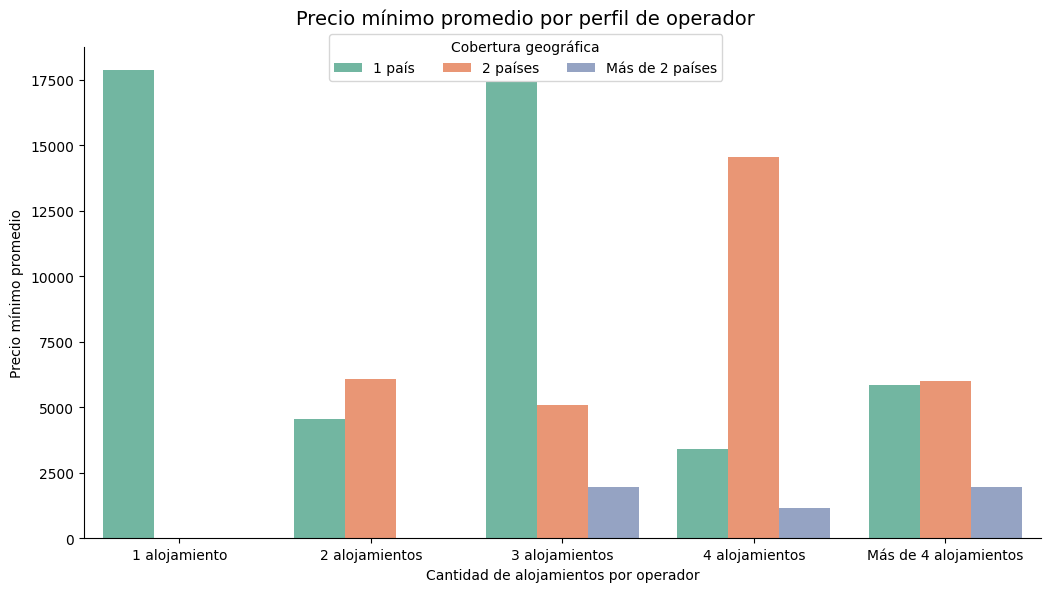

In [25]:
# Gráfico de barras agrupadas:
g = sns.catplot(
    data=tabla_resumen,
    kind='bar',
    x='Grupo alojamientos',
    y='Precio mínimo promedio',
    hue='Grupo países',
    palette='Set2',
    height=6,
    aspect=1.5
)

# Estética del gráfico:
g.fig.suptitle('Precio mínimo promedio por perfil de operador', fontsize=14)
g.set_axis_labels('Cantidad de alojamientos por operador', 'Precio mínimo promedio')
g.fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3).set_title('Cobertura geográfica')
g._legend.remove()
plt.tight_layout()
plt.show()

Al analizar el **precio mínimo promedio por operador**, se observa una distribución mucho más uniforme que en las variables anteriores. Los precios varían de forma continua entre operadores, sin una concentración extrema en rangos bajos o altos. Al cruzar esta variable con la cantidad de alojamientos y países, se identifican **perfiles con precios más elevados en grupos de mayor escala y cobertura**, aunque también existen **operadores multinacionales con precios competitivos**. Esto sugiere que la estrategia de precios no está determinada únicamente por la escala, sino también por el **posicionamiento y el tipo de mercado** en el que cada operador participa.

#### 📅 Disponibilidad promedio por país.

En esta etapa se analizará la cantidad promedio de días disponibles que los alojamientos ofrecen en cada país. Esta métrica permite entender el nivel de actividad operativa de los anfitriones y puede reflejar distintos modelos de negocio, como:
- Alojamientos de uso exclusivo para renta (alta disponibilidad)
- Propiedades compartidas o de uso ocasional (baja disponibilidad)
- Restricciones estacionales o normativas locales

El gráfico elegido será un gráfico de barras horizontales, donde cada barra representa un país y su longitud corresponde al promedio de días disponibles. Este formato facilita la comparación directa entre países y permite detectar patrones de uso o estrategias de operación.

Este tipo de visualización es útil porque:
- Revela diferencias en el compromiso operativo de los anfitriones por país.
- Permite detectar mercados con alta rotación o estacionalidad.
- Complementa el análisis de precios y cantidad de alojamientos, aportando una dimensión temporal clave para entender el comportamiento de la oferta.

C:\Users\jmrey\AppData\Local\Temp\ipykernel_24008\928243114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=disponibilidad_promedio, y='País', x='Disponibilidad Promedio', palette='deep', ax=ax)


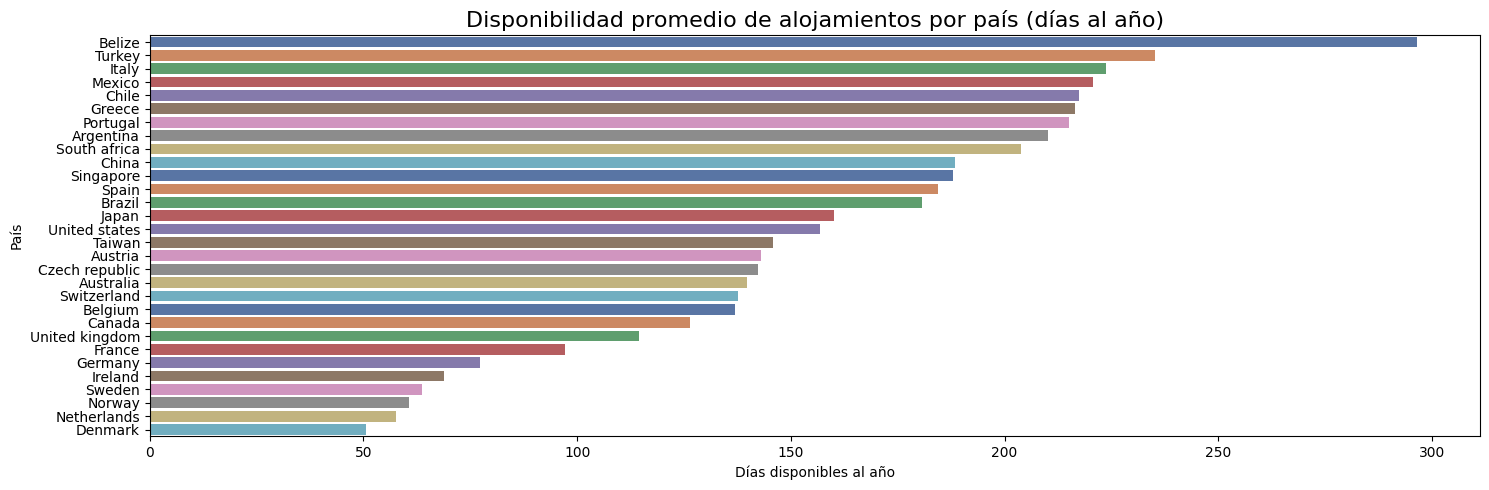

In [26]:
# Agrupar disponibilidad promedio por país:
disponibilidad_promedio = (
    df_airbnb
    .groupby('country')['availability']
    .mean()
    .reset_index()
    .sort_values(by='availability', ascending=False)
)

# Renombrar columnas para presentación:
disponibilidad_promedio.columns = ['País', 'Disponibilidad Promedio']

# Crear gráfico de barras horizontales:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=disponibilidad_promedio, y='País', x='Disponibilidad Promedio', palette='deep', ax=ax)

# Estética del gráfico:
ax.set_title('Disponibilidad promedio de alojamientos por país (días al año)', fontsize=16)
ax.set_xlabel('Días disponibles al año')
ax.set_ylabel('País')
plt.tight_layout()
plt.show()

El análisis de la disponibilidad promedio revela diferencias marcadas en el nivel de actividad operativa entre países. **Belice, Turquía, Italia y México** encabezan la lista con alojamientos disponibles prácticamente todo el año, lo que sugiere modelos de negocio orientados a la renta continua o destinos con baja estacionalidad. En contraste, países como **Dinamarca, Países Bajos y Noruega** muestran disponibilidades más acotadas, posiblemente influenciadas por climas extremos, regulaciones locales o uso compartido de las propiedades.

Los datos del gráfico anterior refuerzan la hipótesis de que el turismo en **Chile y Argentina** podría estar orientado principalmente al público internacional. Ambos países presentan una **alta disponibilidad promedio**, lo que indica una oferta operativa constante. Sin embargo, esta oferta elevada contrasta con los **precios mínimos reales significativamente altos** y con el contexto económico local previamente comentado. Esta combinación resulta incongruente con una lógica de mercado basada en **precio versus oferta**, lo que sugiere que los alojamientos podrían estar diseñados para captar **turismo extranjero** de mayor poder adquisitivo.

Países como **Belice y Turquía** presentan una disponibilidad promedio cercana a los 365 días, pero tienen una base relativamente reducida de anfitriones. Esto sugiere una posible concentración operativa, donde pocos actores gestionan múltiples alojamientos de forma intensiva, probablemente con fines **comerciales o turísticos** continuos.

**España y Reino Unido** muestran una disponibilidad elevada (más de 300 días en promedio) junto con precios mínimos reales promedio por debajo de los $1,000 USD. Esto podría indicar **mercados altamente competitivos**, donde los anfitriones priorizan la ocupación sobre el margen, o bien operan bajo **regulaciones que limitan precios**.

#### ⭐ Cantidad promedio de reseñas por mes por anfitrión.

El análisis del número de reseñas promedio por operador busca capturar una dimensión distinta a la escala o la cobertura geográfica: la **interacción efectiva con los huéspedes**. Mientras que la cantidad de alojamientos refleja la capacidad operativa y el precio mínimo promedio sugiere la estrategia de posicionamiento, las reseñas son un indicador indirecto de experiencia acumulada, visibilidad en la plataforma y volumen de reservas gestionadas.

Este indicador es relevante porque permite diferenciar entre operadores que, aun con pocos alojamientos, han logrado una alta rotación y retroalimentación de clientes, frente a aquellos con mayor inventario, pero menor nivel de interacción. Asimismo, el análisis de la distribución de reseñas promedio ayuda a identificar si la actividad está concentrada en unos pocos operadores con gran volumen de huéspedes, o si existe una participación más homogénea en la generación de experiencias.

Para esta actividad se utilizará un **gráfico de pastel** (pie chart), ya que el objetivo es mostrar la proporción relativa de operadores en función de su nivel de interacción con los huéspedes, medido a través del promedio de reseñas mensuales por anfitrión (`monthly_reviews`).

El gráfico de pastel es adecuado en este caso porque:
* Permite visualizar de manera inmediata la distribución porcentual de los tres grupos definidos: poca interacción (*menos de una reseña al mes en promedio entre todas las propiedades*), interacción media (*entre 1 y 2 reseñas al mes en promedio*) e interacción alta (*más de 2 reseñas al mes en promedio*).
* Facilita la comparación entre categorías mutuamente excluyentes, resaltando qué tipo de operador predomina en el ecosistema.
* Complementa los histogramas previos (que mostraban dispersión y variabilidad) con una representación más sintética y enfocada en la composición global.

De esta forma, el gráfico no busca mostrar la dispersión de valores individuales, sino la participación relativa de cada grupo de operadores en el total, lo que aporta una visión clara y ejecutiva sobre la intensidad de interacción con huéspedes.

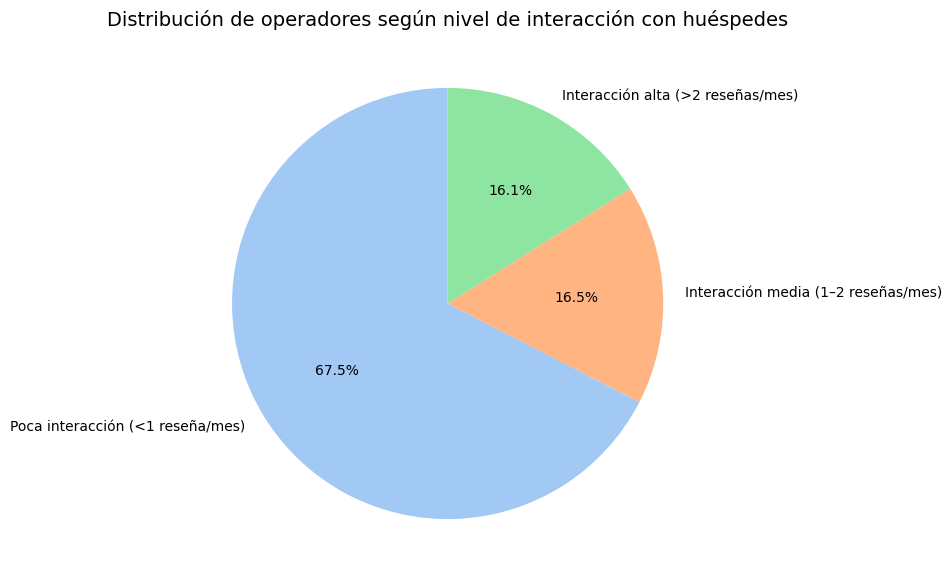

In [27]:
# Calcular el promedio de reseñas mensuales por operador:
reseñas_por_operador = (
    df_airbnb
    .groupby('host_id')['monthly_reviews']
    .mean()
    .reset_index()
    .rename(columns={'monthly_reviews': 'Reseñas promedio mensuales'})
)

# Clasificar a los operadores en categorías de interacción:
def clasificar_interaccion(x):
    if x < 1:
        return 'Poca interacción (<1 reseña/mes)'
    elif 1 <= x <= 2:
        return 'Interacción media (1–2 reseñas/mes)'
    else:
        return 'Interacción alta (>2 reseñas/mes)'

reseñas_por_operador['Nivel de interacción'] = reseñas_por_operador['Reseñas promedio mensuales'].apply(clasificar_interaccion)

# Contar operadores por categoría:
conteo_interaccion = (
    reseñas_por_operador['Nivel de interacción']
    .value_counts(normalize=True)
    .reset_index()
    .rename(columns={'proportion': 'Porcentaje'})
)
conteo_interaccion['Porcentaje'] = conteo_interaccion['Porcentaje'] * 100

# Graficar gráfico de pastel:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    conteo_interaccion['Porcentaje'],
    labels=conteo_interaccion['Nivel de interacción'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')[0:3]
)
ax.set_title('Distribución de operadores según nivel de interacción con huéspedes', fontsize=14)
plt.show()

La gran mayoría de los operadores (alrededor de dos tercios) se ubican en el grupo de poca interacción, con menos de una reseña mensual en promedio. Esto confirma que el ecosistema está dominado por **anfitriones con baja rotación** o con una presencia más bien **ocasional** en la plataforma.

En contraste, los grupos de interacción media y alta representan cada uno cerca de una sexta parte del total. Estos operadores, aunque minoritarios, concentran una mayor actividad con huéspedes, lo que puede reflejar experiencia acumulada, mayor visibilidad o un modelo de operación más profesionalizado.

En conjunto, la distribución muestra un mercado donde predominan los anfitriones de baja interacción, pero donde existe un segmento relevante de operadores con mayor dinamismo que probablemente marcan la pauta en términos de reputación y volumen de reservas.

#### 📊 Clasificación de operadores por escala y cobertura geográfica.


En esta última etapa del análisis exploratorio se busca **consolidar los hallazgos** previos mediante la combinación de dos dimensiones fundamentales: la **escala operativa** (cantidad de alojamientos que gestiona cada anfitrión) y la **cobertura geográfica** (número de países en los que tiene presencia). Al cruzar estas variables, podemos visualizar con mayor claridad los distintos perfiles de operadores y evaluar si la hipótesis inicial de dividirlos en tres grupos diferenciados se sostiene con la evidencia.

Este enfoque es relevante porque permite pasar de un análisis unidimensional —donde cada variable se estudia por separado— a una visión integrada que refleja mejor la diversidad de estrategias y niveles de profesionalización dentro del ecosistema. Así, se podrá identificar si los operadores con mayor escala tienden también a diversificarse geográficamente, o si predominan modelos más locales con múltiples alojamientos en un solo país.

En conjunto, esta sección representa el cierre lógico del análisis exploratorio, ya que no solo sintetiza las métricas trabajadas, sino que también ofrece una base sólida para validar la clasificación de operadores y determinar qué variables tienen mayor peso en la diferenciación de perfiles

Para integrar las dimensiones de **cantidad de alojamientos y cobertura geográfica**, se trabajarán distintos gráficos que permitan observar si existen patrones o relaciones significativas entre estas variables. El objetivo es identificar de manera visual cómo se distribuyen los operadores y si emergen perfiles diferenciados que respalden la hipótesis inicial de segmentación en tres grupos.

El primer gráfico será un **diagrama de dispersión**, en el que cada punto representará a un operador. En el eje horizontal se ubicará la cantidad de alojamientos que gestiona, mientras que en el eje vertical se mostrará la cantidad de países en los que opera. Esta representación permitirá detectar rápidamente si los operadores con mayor escala tienden también a diversificarse geográficamente, o si predominan modelos locales con múltiples alojamientos en un solo país.

Cabe señalar que un adelanto de esta relación ya se vislumbró en la sección de **“Precio mínimo promedio por operador”**, donde se observó cómo la escala y la cobertura parecían influir en la estrategia de precios. Sin embargo, este nuevo gráfico se centra exclusivamente en la interacción entre ambas dimensiones estructurales, ofreciendo una visión más directa y comparativa de los perfiles de operadores.

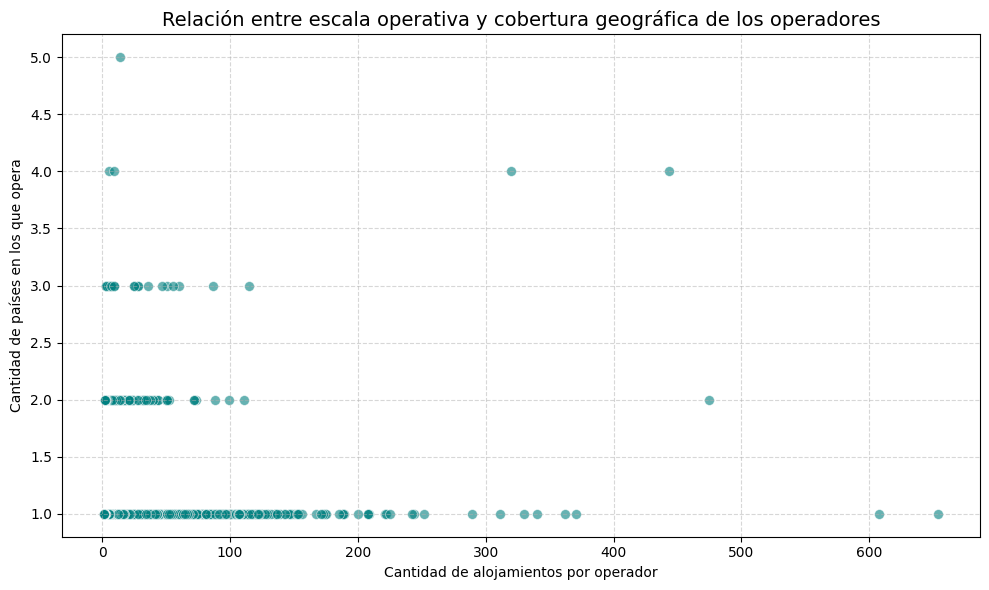

In [28]:
# Calcular cantidad de alojamientos y países por operador:
operadores = (
    df_airbnb
    .groupby('host_id')
    .agg({
        'room_id': 'count',                # número de alojamientos
        'country': pd.Series.nunique  # número de países distintos
    })
    .reset_index()
    .rename(columns={'room_id': 'Cantidad de alojamientos',
                     'country': 'Cantidad de países'})
)

# Graficar diagrama de dispersión:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=operadores,
    x='Cantidad de alojamientos',
    y='Cantidad de países',
    alpha=0.6,
    s=50,
    color='teal'
)

# Estética del gráfico:
plt.title('Relación entre escala operativa y cobertura geográfica de los operadores', fontsize=14)
plt.xlabel('Cantidad de alojamientos por operador')
plt.ylabel('Cantidad de países en los que opera')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Visualizaremos en tabla la información, agrupando por número de alojamientos como ya lo habíamos hecho en la sección de **Alojamientos totales por anfitrión**.

In [29]:
# Calcular cantidad de alojamientos y países por operador:
operadores = (
    df_airbnb
    .groupby('host_id')
    .agg({
        'room_id': 'count',                # número de alojamientos
        'country': pd.Series.nunique  # número de países distintos
    })
    .reset_index()
    .rename(columns={'room_id': 'Cantidad de alojamientos',
                     'country': 'Cantidad de países'})
)

# Clasificar a los operadores en rangos de alojamientos:
def clasificar_alojamientos(x):
    if 1 <= x <= 2:
        return '1–2 alojamientos'
    elif 2 < x <= 3:
        return 'Más de 2–3 alojamientos'
    elif 3 < x <= 4:
        return 'Más de 3–4 alojamientos'
    elif 4 < x <= 6:
        return 'Más de 4–6 alojamientos'
    else:
        return 'Más de 6 alojamientos'

operadores['Rango de alojamientos'] = operadores['Cantidad de alojamientos'].apply(clasificar_alojamientos)

# Agrupar por cantidad de países y rango de alojamientos:
tabla_resumen = (
    operadores
    .groupby(['Cantidad de países', 'Rango de alojamientos'])
    .size()
    .reset_index(name='Cantidad de operadores')
    .sort_values(by=['Cantidad de países', 'Rango de alojamientos'])
)

# Mostrar tabla:
tabla_resumen

,Cantidad de países,Rango de alojamientos,Cantidad de operadores
0,1,1–2 alojamientos,590094
1,1,Más de 2–3 alojamientos,23634
2,1,Más de 3–4 alojamientos,10983
3,1,Más de 4–6 alojamientos,9845
4,1,Más de 6 alojamientos,11973
5,2,1–2 alojamientos,857
6,2,Más de 2–3 alojamientos,233
7,2,Más de 3–4 alojamientos,102
8,2,Más de 4–6 alojamientos,91
9,2,Más de 6 alojamientos,119


Revisando la tabla y gráfico anterior, podemos agrupar a los operadores como:
* **Ocasionales**: aquellos que cuentan solo con 1 ó 2 alojamientos y operan en un único país (parte inferior izquierda del gráfico).
* **Semi-profesionales**: cuentan con más de dos alojamientos, pero solo operan en un único país (se visualizacian como parte de la aparente línea de la parte inferior del gráfico).
* **Intensivos**: aquellos operadores que tienen más de dos alojamientos y operan en más de un país.

En conjunto, la evidencia muestra un ecosistema altamente heterogéneo, donde la gran mayoría de los anfitriones se concentran en el perfil **ocasional**, con operaciones pequeñas y estrictamente locales. Sin embargo, conforme aumenta la escala en número de alojamientos, se observa la transición hacia un grupo **semi-profesional**, que si bien mantiene un enfoque en un solo país, ya refleja una mayor vocación de negocio. Finalmente, el grupo **intensivo**, aunque reducido en número, destaca por combinar múltiples alojamientos con presencia multinacional, lo que los posiciona como actores clave en términos de volumen, experiencia y potencial influencia en el mercado. Esta segmentación no solo valida la hipótesis inicial de tres perfiles diferenciados, sino que también aporta un marco claro para entender la dinámica competitiva y las distintas estrategias de operación dentro de la plataforma.

A continuación, se agregará una nueva columna a nuestra tabla de base de datos, con la cual identificaremos el grupo al que pertenece cada operador, estos grupos serán:
* 1 ---> Operadores **ocasionales** (azul).
* 2 ---> Operadores **semi-profesionales** (verde).
* 3 ---> Operadores **intensivos** (naranja).

Con esta nueva columna de etiqueta, graficaremos un diagrama de dispersión con el cual comparar el precio promedio de los alojamientos por operador y la cantidad de reseñas promedio por operador que ya hemos visto antes, agregando una escala de colores que nos permita distinguir a que grupo pertenece cada operador.

Recordando los resultados del análisis por precio mínimo real (`real_min_price`), antes de agrupar los datos, filtraremos los *outliers* de la base de datos.

In [30]:
# Creamos función de filtrado por IQR:
def filtrar_iqr(df, col):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        return df[(df[col] >= q1) & (df[col] <= q3)]

# Crear copia y filtrar outliers en precio y reseñas:
df_filtrado = df_airbnb.copy()
df_filtrado = filtrar_iqr(df_filtrado, 'real_min_price')

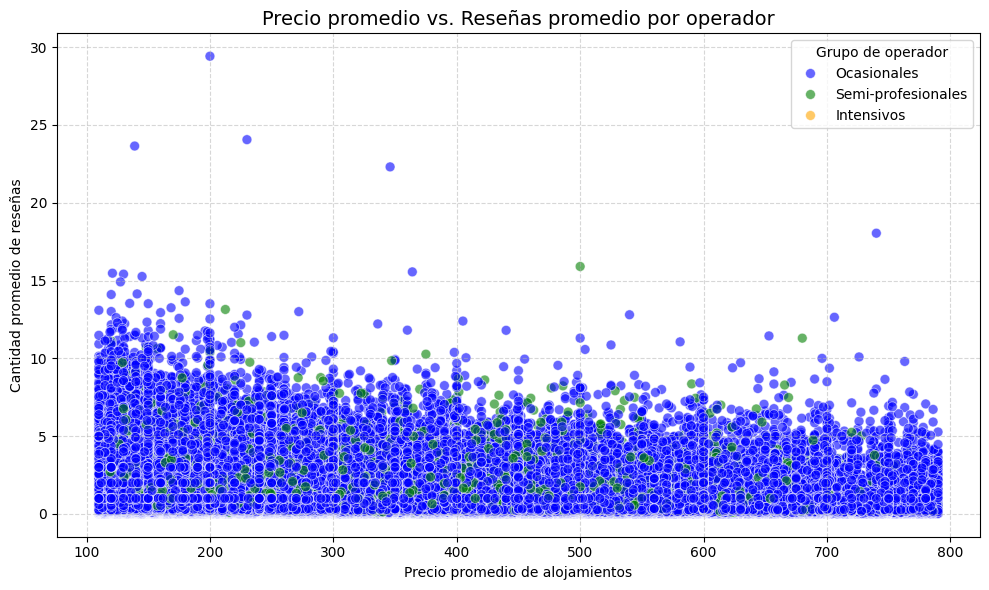

In [31]:
# Calcular métricas por operador:
operadores = (
    df_filtrado
    .groupby('host_id')
    .agg({
        'room_id': 'count',                       # cantidad de alojamientos
        'country': pd.Series.nunique,        # cantidad de países
        'real_min_price': 'mean',                     # precio promedio
        'monthly_reviews': 'mean'          # reseñas promedio
    })
    .reset_index()
    .rename(columns={
        'room_id': 'Cantidad de alojamientos',
        'country': 'Cantidad de países',
        'real_min_price': 'Precio promedio',
        'monthly_reviews': 'Reseñas promedio'
    })
)

# Clasificar operadores en grupos:
def clasificar_operador(row):
    if row['Cantidad de alojamientos'] <= 2 and row['Cantidad de países'] == 1:
        return 1  # Ocasionales
    elif row['Cantidad de alojamientos'] > 2 and row['Cantidad de países'] == 1:
        return 2  # Semi-profesionales
    else:
        return 3  # Intensivos

operadores['Grupo'] = operadores.apply(clasificar_operador, axis=1)

# Definir etiquetas y colores:
mapa_grupos = {
    1: 'Ocasionales',
    2: 'Semi-profesionales',
    3: 'Intensivos'
}
colores = {
    'Ocasionales': 'blue',
    'Semi-profesionales': 'green',
    'Intensivos': 'orange'
}

operadores['Grupo etiqueta'] = operadores['Grupo'].map(mapa_grupos)

# Graficar diagrama de dispersión:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=operadores,
    x='Precio promedio',
    y='Reseñas promedio',
    hue='Grupo etiqueta',
    palette=colores,
    alpha=0.6,
    s=50
)

plt.title('Precio promedio vs. Reseñas promedio por operador', fontsize=14)
plt.xlabel('Precio promedio de alojamientos')
plt.ylabel('Cantidad promedio de reseñas')
plt.legend(title='Grupo de operador')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El gráfico anterior nos muestra que las variables de **precio mínimo** y la **cantidad de reseñas promedio** para los alojamientos de los operadores, en realidad no nos aportan una separación clara en cuanto a los grupos de operadores tal y como se han definido a lo largo del trabajo; sin embargo, para poder validar esto, el calcular una **matriz de correlación** será muy valioso.

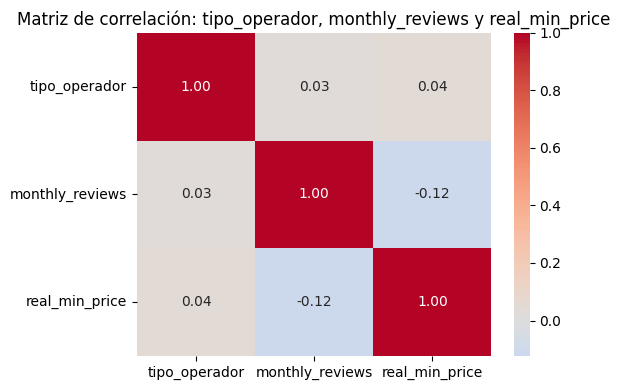

In [32]:
#  Merge para agregar tipo_operador al df_filtrado:
df_filtrado = df_filtrado.merge(
    operadores[['host_id', 'Grupo']],
    on='host_id',
    how='left'
).rename(columns={'Grupo': 'tipo_operador'})

# Seleccionar variables de interés:
variables = df_filtrado[['tipo_operador', 'monthly_reviews', 'real_min_price']]

# Calcular matriz de correlación:
corr = variables.corr()

# Graficar heatmap:
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f"
)
plt.title('Matriz de correlación: tipo_operador, monthly_reviews y real_min_price', fontsize=12)
plt.tight_layout()
plt.show()

La matriz de correlación confirma lo anticipado: bajo la clasificación de operadores que hemos definido, ni el precio mínimo ni las reseñas mensuales aportan información relevante para diferenciar los grupos. Es posible que, al considerar no solo la cantidad de países en los que operan los anfitriones, sino también cuáles son esos países, el precio adquiera un papel más significativo. No obstante, esa exploración corresponde a un análisis posterior.

### Resumen de las observaciones más significativas.

El análisis exploratorio comenzó con la preparación y depuración de la base de datos, asegurando que las variables seleccionadas fueran consistentes y útiles para el estudio. Se eliminaron registros inactivos, se convirtieron las columnas de fecha a un formato adecuado y se calculó una métrica fundamental: el precio mínimo real, definido como el precio por noche multiplicado por el número mínimo de noches requeridas para reservar. Esta transformación permitió contar con un indicador más fiel del desembolso efectivo que un huésped debe realizar para acceder a un alojamiento, lo que lo convierte en una variable clave para entender las estrategias de posicionamiento de los anfitriones.

Posteriormente, se realizaron exploraciones descriptivas a nivel país y operador. Se identificó la distribución de alojamientos y anfitriones en los mercados más representados, como Estados Unidos y varios países europeos, y se observaron diferencias importantes entre la cantidad de alojamientos y la cantidad de anfitriones únicos. Este hallazgo reveló que en algunos países la oferta está concentrada en pocos operadores, mientras que en otros existe una base más amplia de anfitriones individuales. En paralelo, el análisis del precio mínimo real por país mostró valores extremos que distorsionaban los promedios, lo que llevó a aplicar técnicas de filtrado basadas en el rango intercuartílico (IQR) para depurar outliers y obtener representaciones más claras de las distribuciones.

Con los datos filtrados, se procedió a la construcción de perfiles de anfitriones. Para ello se definieron dos variables estructurales: la cantidad de alojamientos gestionados por cada host_id y la cantidad de países en los que cada anfitrión tiene presencia. A partir de estas dimensiones se establecieron tres categorías: operadores ocasionales, semi-profesionales e intensivos. Los ocasionales se caracterizan por gestionar uno o dos alojamientos en un solo país; los semi-profesionales por manejar más de dos alojamientos, también en un único país; y los intensivos por operar múltiples alojamientos en más de un país. Esta clasificación permitió distinguir con claridad distintos niveles de profesionalización dentro de la plataforma.

El precio mínimo real se analizó en relación con estos perfiles, buscando identificar patrones que reforzaran la clasificación. Se observó que los operadores ocasionales presentan una alta variabilidad en sus precios, influenciada principalmente por el contexto local y el tipo de alojamiento. En México, por ejemplo, existen casos en los que el huésped se hospeda en una habitación dentro de una casa habitada, lo que refleja un perfil ocasional con precios moderados y experiencias más domésticas. En contraste, los operadores intensivos tienden a ofrecer alojamientos con características más estandarizadas, como habitaciones de hotel o viviendas completas en zonas turísticas, lo que se traduce en estrategias de precio más consistentes y competitivas. Los semi-profesionales se ubican en un punto intermedio, con cierta estructura operativa pero sin diversificación geográfica, lo que se refleja en precios que buscan balancear rentabilidad y ocupación.

La interpretación de estos resultados mostró que, aunque el precio mínimo real por sí solo no es suficiente para separar con nitidez los perfiles, su análisis en conjunto con la escala y la cobertura geográfica aporta información valiosa sobre las estrategias de los anfitriones. El precio se convierte en una variable contextual que, al ser cruzada con el tipo de alojamiento y la región, permite perfilar con mayor precisión el nivel de profesionalización de cada operador. La presentación de estas observaciones se realizó mediante tablas y diagramas de dispersión, que evidenciaron la concentración de operadores en la parte baja de la escala y la escasa presencia de perfiles multinacionales, validando así la hipótesis inicial y dando sustento a la clasificación propuesta.


## Conclusión y recomendaciones.

El análisis exploratorio realizado sobre la base de datos de Airbnb permitió establecer una clasificación clara de los anfitriones en tres perfiles operativos: ocasionales, semi-profesionales e intensivos. Esta segmentación se construyó a partir de variables estructurales como la cantidad de alojamientos gestionados y la cobertura geográfica, lo que ofreció una visión robusta de los distintos niveles de profesionalización dentro de la plataforma. El cálculo del precio mínimo real, junto con la depuración de outliers, aportó un contexto adicional para comprender las estrategias de posicionamiento de los anfitriones, aunque se confirmó que por sí solo no es suficiente para diferenciar los perfiles.

La interpretación de los resultados mostró que la mayoría de los anfitriones participan de manera limitada y local, mientras que un grupo reducido concentra operaciones más amplias y diversificadas. Este hallazgo refleja la dualidad de la plataforma: por un lado, un ecosistema de usuarios que ofrecen espacios domésticos y experiencias más personales; por otro, operadores con estructuras empresariales que buscan rentabilidad y estandarización. La combinación de evidencia cuantitativa y visualizaciones permitió validar la hipótesis inicial y sentar las bases para un modelo predictivo replicable.

En conjunto, el proyecto demuestra que incluso con un conjunto limitado de variables es posible construir perfiles operativos significativos y útiles para entender dinámicas de negocio en plataformas digitales. La metodología aplicada no solo aporta claridad sobre Airbnb, sino que también ofrece un marco adaptable a otros contextos de economía colaborativa. El siguiente paso natural es avanzar hacia un modelo de clasificación automatizado que permita identificar perfiles de anfitriones de manera sistemática y explorar nuevas dimensiones que enriquezcan la interpretación.

### Recomendaciones.

A continuación, se presentan algunas recomendaciones a seguir si se quisiera profundizar en este trabajo y obtener mejores resultados o, simplemente, resultados que puedan ser utilizados en un contexto más específico.

1) Incorporar el tipo de alojamiento en el análisis: distinguir entre vivienda completa, habitación privada y formatos tipo hotel para refinar la clasificación de operadores y vincularla directamente con estrategias de precio y posicionamiento.
2) Desagregar la variable geográfica: pasar de la cantidad de países a la identificación de cuáles países o ciudades, integrando factores regulatorios, culturales y económicos que influyen en el perfil de los anfitriones.
3) Ampliar la base de datos con información más reciente y granular: incluir series temporales que permitan observar tendencias, estacionalidad y evolución de los perfiles operativos en el tiempo.
4) Construir un modelo predictivo supervisado: utilizar algoritmos de clasificación (por ejemplo, árboles de decisión o random forest) para automatizar la asignación de perfiles a nuevos anfitriones, validando la precisión del modelo con métricas de desempeño.
